In [209]:
import numpy as np
import pandas as pd
from calendar import weekday
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import *
from numpy import *

# Loading the data sets

In [2]:
beijing = pd.read_csv('BeijingPM20100101_20151231.csv')
chengdu = pd.read_csv('ChengduPM20100101_20151231.csv')
guangzhou = pd.read_csv('GuangzhouPM20100101_20151231.csv')
shanghai = pd.read_csv('ShanghaiPM20100101_20151231.csv')
shenyang = pd.read_csv('ShenyangPM20100101_20151231.csv')

In [3]:
# mark the different city
beijing['city'] = 1
chengdu['city'] = 2
guangzhou['city'] = 3
shanghai['city'] = 4
shenyang['city'] = 5

# Data Preprocessing

## check the missing value

In [4]:
# use the PM_US POST as the predicator
beijing.isnull().sum() / beijing.shape[0] 

No                 0.000000
year               0.000000
month              0.000000
day                0.000000
hour               0.000000
season             0.000000
PM_Dongsi          0.523581
PM_Dongsihuan      0.609995
PM_Nongzhanguan    0.525882
PM_US Post         0.041781
DEWP               0.000095
HUMI               0.006447
PRES               0.006447
TEMP               0.000095
cbwd               0.000095
Iws                0.000095
precipitation      0.009204
Iprec              0.009204
city               0.000000
dtype: float64

In [5]:
beijing.drop('PM_Dongsi', axis = 1, inplace = True)
beijing.drop('PM_Dongsihuan', axis = 1, inplace = True)
beijing.drop('PM_Nongzhanguan', axis = 1, inplace = True)
beijing.dropna(inplace = True)
beijing.shape

(49579, 16)

In [6]:
chengdu.isnull().sum() / chengdu.shape[0] 

No               0.000000
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_Caotangsi     0.535600
PM_Shahepu       0.532291
PM_US Post       0.450403
DEWP             0.010060
HUMI             0.010174
PRES             0.009908
TEMP             0.010022
cbwd             0.009908
Iws              0.010136
precipitation    0.056196
Iprec            0.056196
city             0.000000
dtype: float64

In [7]:
chengdu.drop('PM_Caotangsi', axis = 1, inplace = True)
chengdu.drop('PM_Shahepu', axis = 1, inplace = True)
chengdu.dropna(inplace = True)
chengdu.shape

(27368, 16)

In [8]:
guangzhou.isnull().sum() / guangzhou.shape[0]

No                      0.000000
year                    0.000000
month                   0.000000
day                     0.000000
hour                    0.000000
season                  0.000019
PM_City Station         0.384756
PM_5th Middle School    0.598832
PM_US Post              0.384756
DEWP                    0.000019
HUMI                    0.000019
PRES                    0.000019
TEMP                    0.000019
cbwd                    0.000019
Iws                     0.000019
precipitation           0.000019
Iprec                   0.000019
city                    0.000000
dtype: float64

In [9]:
guangzhou.drop('PM_City Station', axis = 1, inplace = True)
guangzhou.drop('PM_5th Middle School', axis = 1, inplace = True)
guangzhou.dropna(inplace = True)
guangzhou.shape

(32351, 16)

In [10]:
shanghai.isnull().sum() / shanghai.shape[0]

No               0.000000
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_Jingan        0.530275
PM_US Post       0.352674
PM_Xuhui         0.520976
DEWP             0.000247
HUMI             0.000247
PRES             0.000532
TEMP             0.000247
cbwd             0.000228
Iws              0.000228
precipitation    0.076240
Iprec            0.076240
city             0.000000
dtype: float64

In [11]:
shanghai.drop('PM_Jingan', axis = 1, inplace = True)
shanghai.drop('PM_Xuhui', axis = 1, inplace = True)
shanghai.dropna(inplace = True)
shanghai.shape

(31880, 16)

In [12]:
shenyang.isnull().sum() / shenyang.shape[0]

No               0.000000
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_Taiyuanjie    0.536209
PM_US Post       0.587707
PM_Xiaoheyan     0.531664
DEWP             0.013160
HUMI             0.012932
PRES             0.013160
TEMP             0.013160
cbwd             0.013160
Iws              0.013160
precipitation    0.242716
Iprec            0.242716
city             0.000000
dtype: float64

In [13]:
shenyang.drop('PM_Taiyuanjie', axis = 1, inplace = True)
shenyang.drop('PM_Xiaoheyan', axis = 1, inplace = True)
shenyang.dropna(inplace = True)
shenyang.shape

(20452, 16)

## check the datatype

In [14]:
beijing.head() 

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,city
23,24,2010,1,1,23,4,129.0,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0,1
24,25,2010,1,2,0,4,148.0,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0,1
25,26,2010,1,2,1,4,159.0,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0,1
26,27,2010,1,2,2,4,181.0,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0,1
27,28,2010,1,2,3,4,138.0,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0,1


### 'cbdw' should be changed into one-hot 

In [15]:
beijing['cbwd'].unique()

array(['cv', 'SE', 'NW', 'NE'], dtype=object)

In [16]:
chengdu['cbwd'].unique()

array(['cv', 'NE', 'SW', 'NW', 'SE'], dtype=object)

In [17]:
shanghai['cbwd'].unique()

array(['NE', 'NW', 'cv', 'SE', 'SW'], dtype=object)

In [18]:
shenyang['cbwd'].unique()

array(['SW', 'cv', 'SE', 'NW', 'NE'], dtype=object)

In [19]:
guangzhou['cbwd'].unique()

array(['NE', 'NW', 'cv', 'SE', 'SW'], dtype=object)

In [20]:
# for beijing
train_data1 = pd.DataFrame(beijing, columns = ['cbwd'])
train_one_hot = pd.get_dummies(train_data1)
beijing.drop('cbwd', axis = 1, inplace = True)
beijing = pd.concat([beijing, train_one_hot], axis = 1)
beijing['cbwd_SW'] = 0

In [21]:
# for shanghai
train_data1 = pd.DataFrame(shanghai, columns = ['cbwd'])
train_one_hot = pd.get_dummies(train_data1)
shanghai.drop('cbwd', axis = 1, inplace = True)
shanghai = pd.concat([shanghai, train_one_hot], axis = 1)

In [22]:
# for chengdu
train_data1 = pd.DataFrame(chengdu, columns = ['cbwd'])
train_one_hot = pd.get_dummies(train_data1)
chengdu.drop('cbwd', axis = 1, inplace = True)
chengdu = pd.concat([chengdu, train_one_hot], axis = 1)

In [23]:
# for shenyang
train_data1 = pd.DataFrame(shenyang, columns = ['cbwd'])
train_one_hot = pd.get_dummies(train_data1)
shenyang.drop('cbwd', axis = 1, inplace = True)
shenyang = pd.concat([shenyang, train_one_hot], axis = 1)

In [24]:
# for guangzhou
train_data1 = pd.DataFrame(guangzhou, columns = ['cbwd'])
train_one_hot = pd.get_dummies(train_data1)
guangzhou.drop('cbwd', axis = 1, inplace = True)
guangzhou = pd.concat([guangzhou, train_one_hot], axis = 1)

### delete the column 'No'

In [51]:
beijing.drop('No', axis = 1, inplace = True)
chengdu.drop('No', axis = 1, inplace = True)
guangzhou.drop('No', axis = 1, inplace = True)
shenyang.drop('No', axis = 1, inplace = True)
shanghai.drop('No', axis = 1, inplace = True)

## add the attiubte indicating weekday and weekend

In [25]:
for i, row in beijing.iterrows():
    week = weekday(beijing.loc[i, 'year'], 
                   beijing.loc[i, 'month'], 
                   beijing.loc[i, 'day'])
    if week < 5:
        beijing.loc[i, 'weekday'] = 1
    else:
        beijing.loc[i, 'weekday'] = 0

In [26]:
for i, row in shanghai.iterrows():
    week = weekday(shanghai.loc[i, 'year'], 
                   shanghai.loc[i, 'month'], 
                   shanghai.loc[i, 'day'])
    if week < 5:
        shanghai.loc[i, 'weekday'] = 1
    else:
        shanghai.loc[i, 'weekday'] = 0

In [27]:
for i, row in chengdu.iterrows():
    week = weekday(chengdu.loc[i, 'year'], 
                   chengdu.loc[i, 'month'], 
                   chengdu.loc[i, 'day'])
    if week < 5:
        chengdu.loc[i, 'weekday'] = 1
    else:
        chengdu.loc[i, 'weekday'] = 0

In [28]:
for i, row in shenyang.iterrows():
    week = weekday(shenyang.loc[i, 'year'], 
                   shenyang.loc[i, 'month'], 
                   shenyang.loc[i, 'day'])
    if week < 5:
        shenyang.loc[i, 'weekday'] = 1
    else:
        shenyang.loc[i, 'weekday'] = 0

In [29]:
for i, row in guangzhou.iterrows():
    week = weekday(guangzhou.loc[i, 'year'], 
                   guangzhou.loc[i, 'month'], 
                   guangzhou.loc[i, 'day'])
    if week < 5:
        guangzhou.loc[i, 'weekday'] = 1
    else:
        guangzhou.loc[i, 'weekday'] = 0

## add the difference between 'dewp' and 'temp'

In [30]:
beijing['diff'] = beijing['DEWP'] - beijing['TEMP']
shanghai['diff'] = shanghai['DEWP'] - shanghai['TEMP']
chengdu['diff'] = chengdu['DEWP'] - chengdu['TEMP']
shenyang['diff'] = shenyang['DEWP'] - shenyang['TEMP']
guangzhou['diff'] = guangzhou['DEWP'] - guangzhou['TEMP']

## check the correlation of the attributes 

<AxesSubplot:>

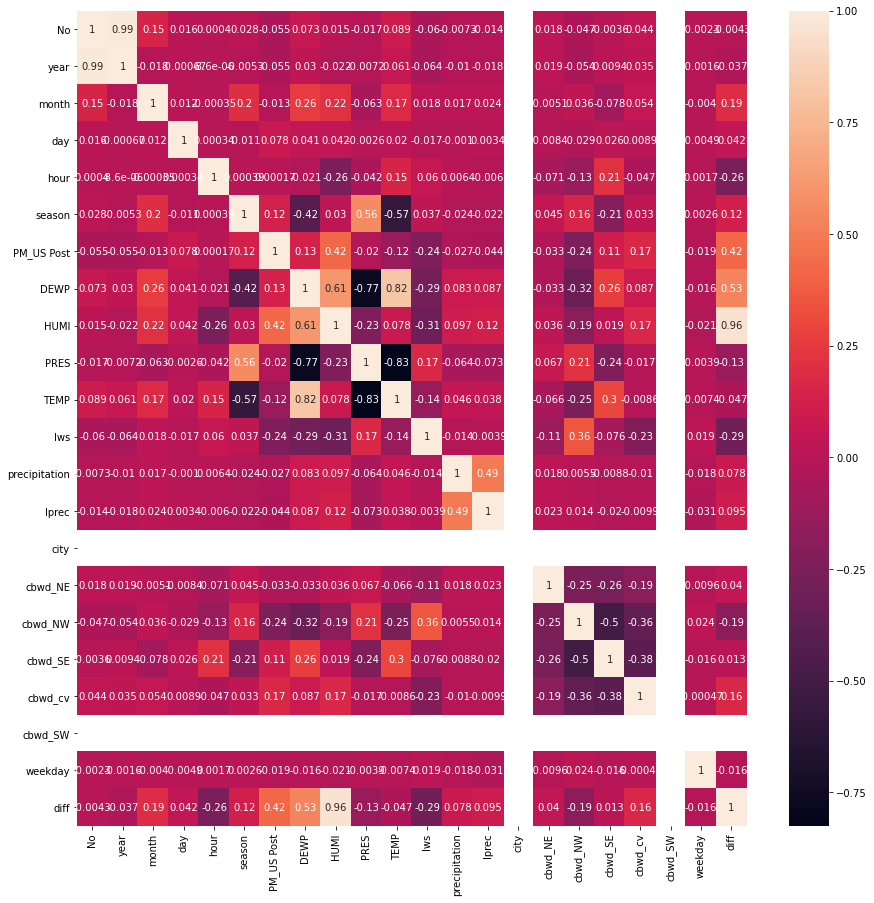

In [31]:
fig = plt.figure(figsize = (15, 15))
sns.heatmap(beijing.corr(), annot=True)

## normalize the data

In [32]:
beijing.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,...,precipitation,Iprec,city,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,cbwd_SW,weekday,diff
23,24,2010,1,1,23,4,129.0,-17.0,41.0,1020.0,...,0.0,0.0,1,0,0,0,1,0,1.0,-12.0
24,25,2010,1,2,0,4,148.0,-16.0,38.0,1020.0,...,0.0,0.0,1,0,0,1,0,0,0.0,-12.0
25,26,2010,1,2,1,4,159.0,-15.0,42.0,1020.0,...,0.0,0.0,1,0,0,1,0,0,0.0,-11.0
26,27,2010,1,2,2,4,181.0,-11.0,63.5,1021.0,...,0.0,0.0,1,0,0,1,0,0,0.0,-6.0
27,28,2010,1,2,3,4,138.0,-7.0,85.0,1022.0,...,0.0,0.0,1,0,0,1,0,0,0.0,-2.0


### check the distribution of continuous attributes

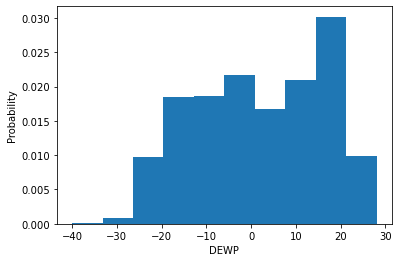

In [33]:
plt.hist(beijing['DEWP'], density=True)
plt.ylabel('Probability')
plt.xlabel('DEWP');

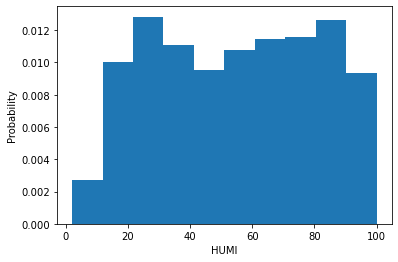

In [34]:
plt.hist(beijing['HUMI'], density=True)
plt.ylabel('Probability')
plt.xlabel('HUMI');

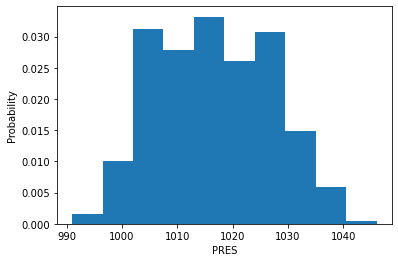

In [35]:
plt.hist(beijing['PRES'], density=True)
plt.ylabel('Probability')
plt.xlabel('PRES');

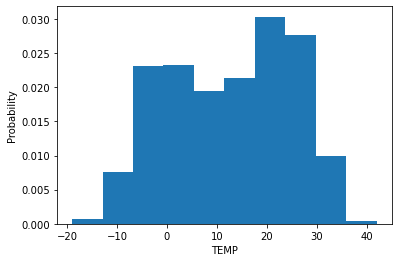

In [36]:
plt.hist(beijing['TEMP'], density=True)
plt.ylabel('Probability')
plt.xlabel('TEMP');

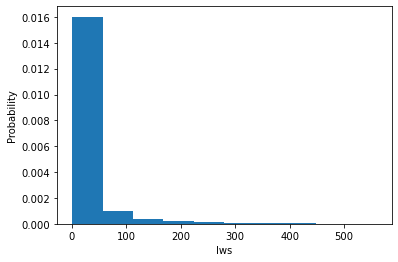

In [37]:
plt.hist(beijing['Iws'], density=True)
plt.ylabel('Probability')
plt.xlabel('Iws');

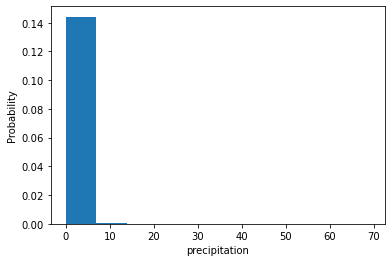

In [38]:
plt.hist(beijing['precipitation'], density=True)
plt.ylabel('Probability')
plt.xlabel('precipitation');

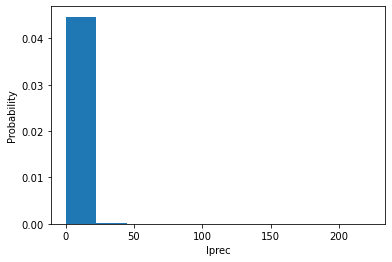

In [39]:
plt.hist(beijing['Iprec'], density=True)
plt.ylabel('Probability')
plt.xlabel('Iprec');

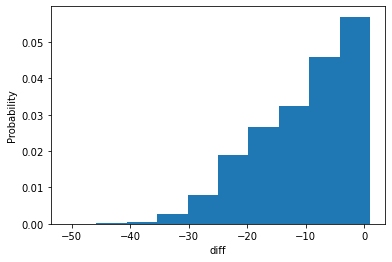

In [40]:
plt.hist(beijing['diff'], density=True)
plt.ylabel('Probability')
plt.xlabel('diff');

### use MinMaxScaler to normalize the continuous data

In [41]:
transform = MinMaxScaler().fit_transform(
    beijing[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']])
beijing[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']] = transform

In [42]:
transform = MinMaxScaler().fit_transform(
    shanghai[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']])
shanghai[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']] = transform

In [43]:
transform = MinMaxScaler().fit_transform(
    chengdu[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']])
chengdu[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']] = transform

In [44]:
transform = MinMaxScaler().fit_transform(
    shenyang[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']])
shenyang[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']] = transform

In [45]:
transform = MinMaxScaler().fit_transform(
    guangzhou[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']])
guangzhou[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'diff']] = transform

### change the format of year

In [46]:
beijing['year'] = beijing['year'] - 2010
shanghai['year'] = shanghai['year'] - 2010
chengdu['year'] = chengdu['year'] - 2010
shenyang['year'] = shenyang['year'] - 2010
guangzhou['year'] = guangzhou['year'] - 2010

In [52]:
data = pd.concat([beijing, shanghai, chengdu, guangzhou, shenyang], axis = 0)

# Model constrution

## linear regression

### linear regression with l2-norm regularization

#### Beijing

In [54]:
# take Beijing as an example, split the dataset into trianing and test
trainx, testx, trainy, testy = model_selection.train_test_split(
    beijing.drop('PM_US Post', axis = 1), beijing['PM_US Post'], test_size = 0.1
    , random_state = 0)

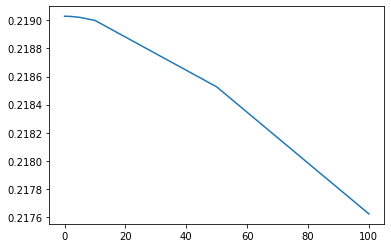

In [214]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

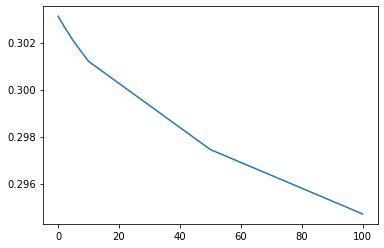

In [69]:
plt.plot(alpha_list, testAEs[0])

In [218]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % 
          (beijing.drop('PM_US Post', axis = 1).columns[i],v))

year importance: -3.83612
month importance: -0.85951
day importance: 0.39620
hour importance: 0.55446
season importance: 7.29050
DEWP importance: -100.78341
HUMI importance: 87.08921
PRES importance: -49.66834
TEMP importance: -21.26054
Iws importance: -109.61617
precipitation importance: -33.60579
Iprec importance: -85.20678
city importance: -7.31211
cbwd_NE importance: -13.08302
cbwd_NW importance: -12.36549
cbwd_SE importance: 8.24493
cbwd_cv importance: 12.71920
cbwd_SW importance: 4.48438
weekday importance: -1.10486
diff importance: 2.62600


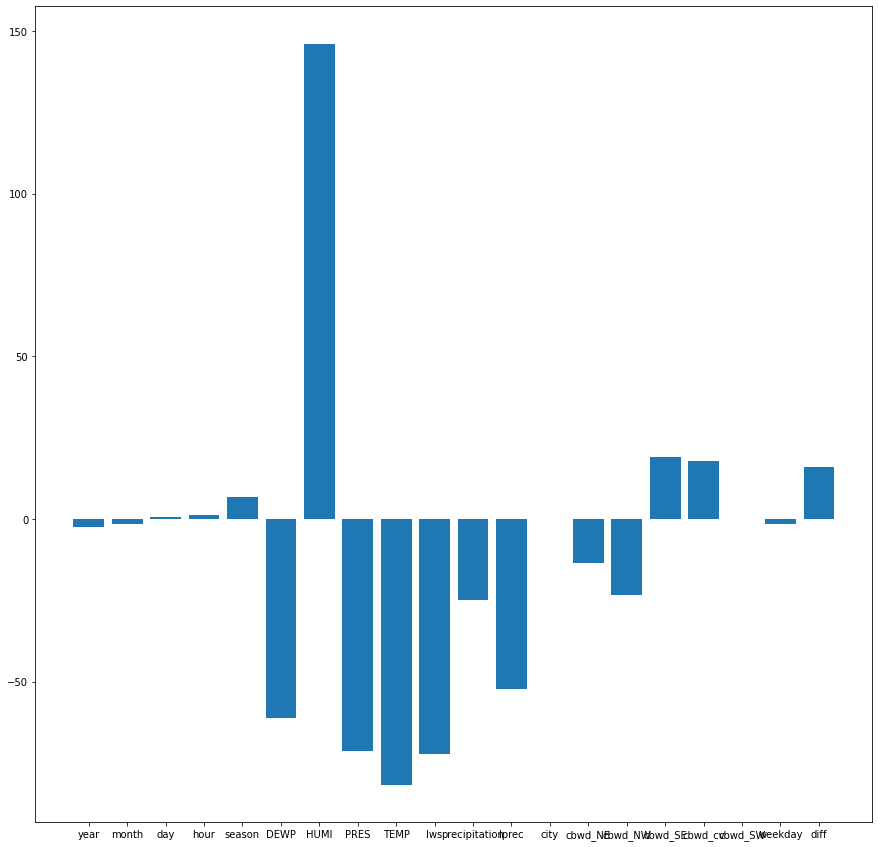

In [80]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(beijing.drop('PM_US Post', axis = 1).columns, importance)
plt.show()

#### Shanghai

In [314]:
# try shanghai, split the dataset into trianing and test
attribute = shanghai.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shanghai['PM_US Post'], test_size = 0.1
    , random_state = 0)

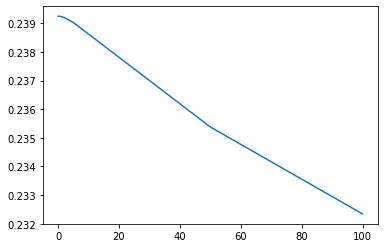

In [315]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

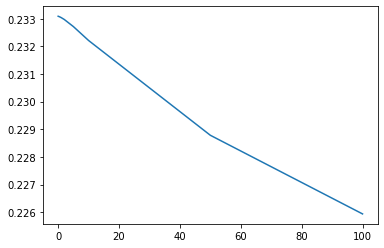

In [316]:
plt.plot(alpha_list, testAEs[0])

In [317]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -1.55101
month importance: -0.20732
day importance: 0.01046
hour importance: 0.39563
season importance: 2.17478
DEWP importance: -26.46095
HUMI importance: -4.51079
PRES importance: -5.19289
TEMP importance: -34.33944
Iws importance: -51.68955
precipitation importance: -7.14341
Iprec importance: -18.77543
city importance: 0.00000
cbwd_NE importance: -16.70630
cbwd_NW importance: 12.14632
cbwd_SE importance: -11.59053
cbwd_SW importance: 8.18481
cbwd_cv importance: 7.96569
weekday importance: -0.29285
diff importance: 11.07913


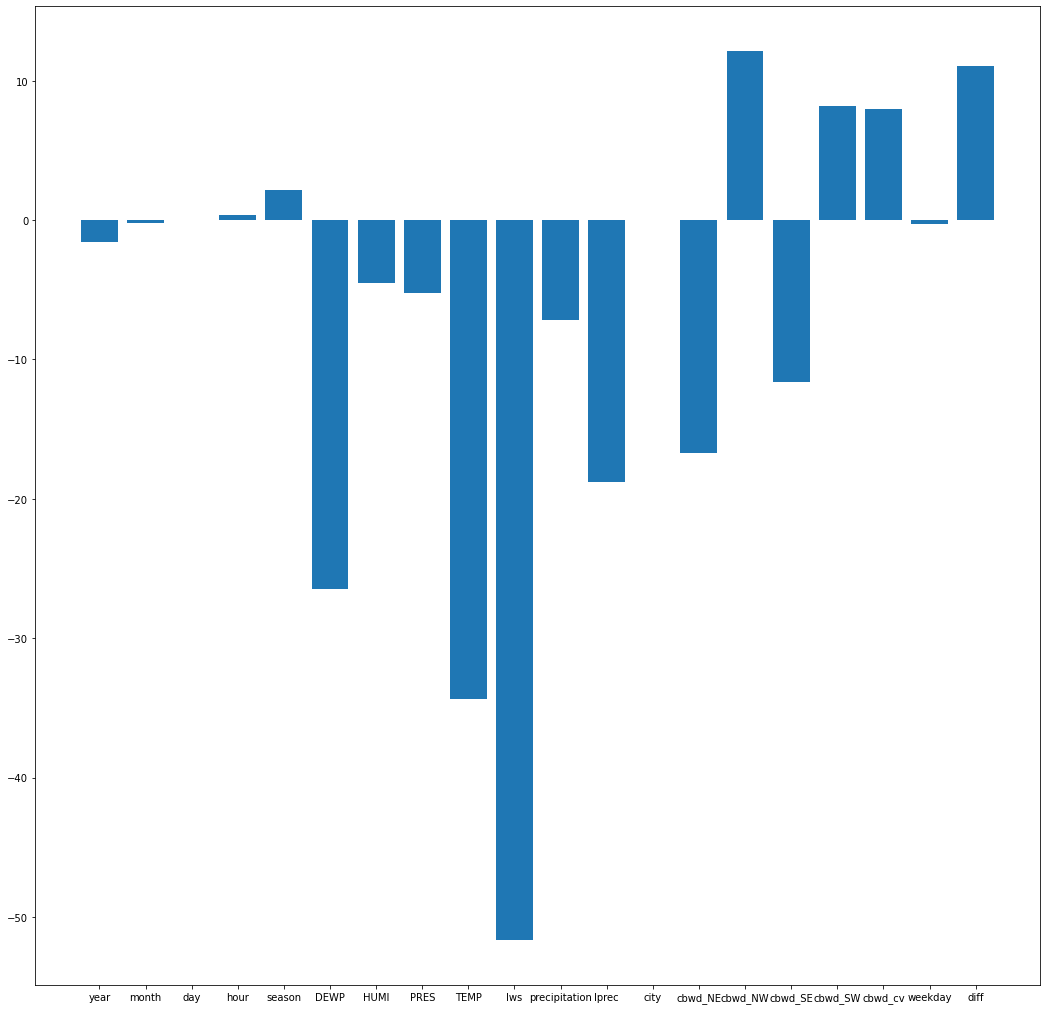

In [318]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Chengdu

In [319]:
# split the dataset into trianing and test
attribute = chengdu.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, chengdu['PM_US Post'], test_size = 0.1
    , random_state = 0)

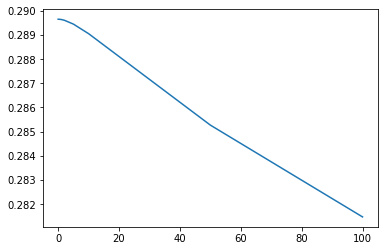

In [320]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

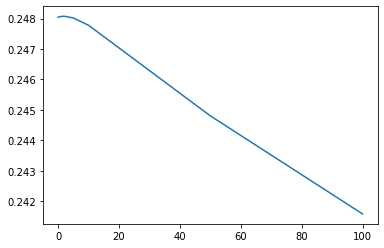

In [321]:
plt.plot(alpha_list, testAEs[0])

In [322]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -8.70632
month importance: -4.08470
day importance: 0.41675
hour importance: 0.19623
season importance: 12.92433
DEWP importance: -33.66544
HUMI importance: 20.23479
PRES importance: -13.29123
TEMP importance: -42.74996
Iws importance: -50.37979
precipitation importance: -9.58054
Iprec importance: -25.22437
city importance: 0.00000
cbwd_NE importance: -12.80837
cbwd_NW importance: 0.67628
cbwd_SE importance: -2.62403
cbwd_SW importance: 3.57208
cbwd_cv importance: 11.18404
weekday importance: 1.53263
diff importance: 7.37804


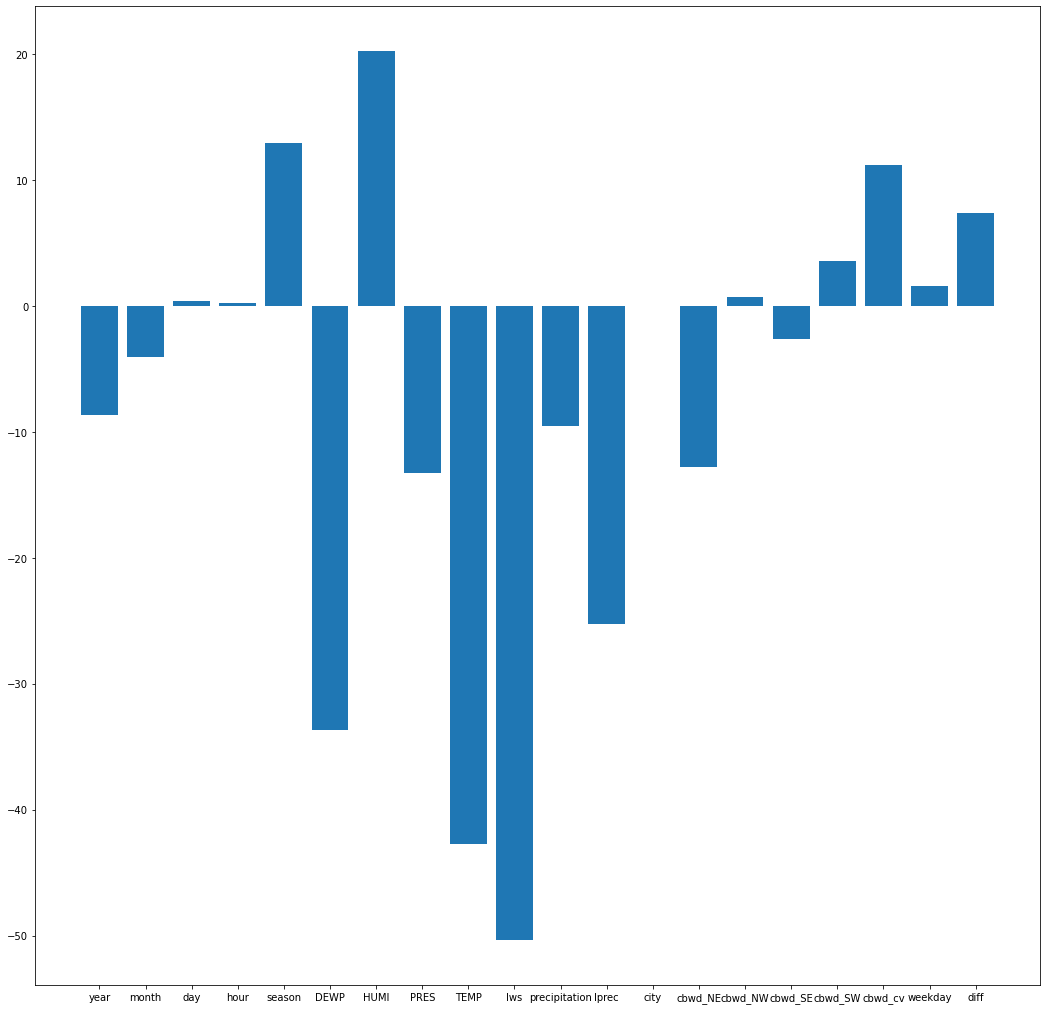

In [323]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Shenyang

In [100]:
# split the dataset into trianing and test
attribute = shenyang.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shenyang['PM_US Post'], test_size = 0.1
    , random_state = 0)

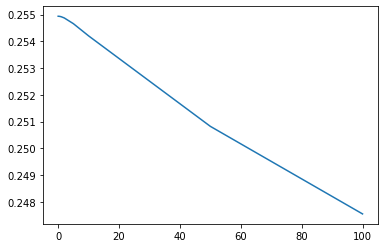

In [101]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

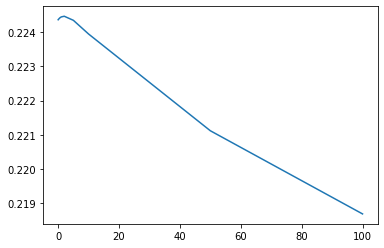

In [102]:
plt.plot(alpha_list, testAEs[0])

In [103]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 1.92178
month importance: -0.08583
day importance: 0.77971
hour importance: 0.03741
season importance: 3.51575
DEWP importance: -22.07665
HUMI importance: 43.01131
PRES importance: 78.84310
TEMP importance: -26.14708
Iws importance: -7.64111
precipitation importance: -2.89037
Iprec importance: -14.18935
city importance: 0.00000
cbwd_NE importance: 6.31120
cbwd_NW importance: -27.01997
cbwd_SE importance: 8.16726
cbwd_SW importance: 2.12547
cbwd_cv importance: 10.41605
weekday importance: -4.81760
diff importance: 8.62376


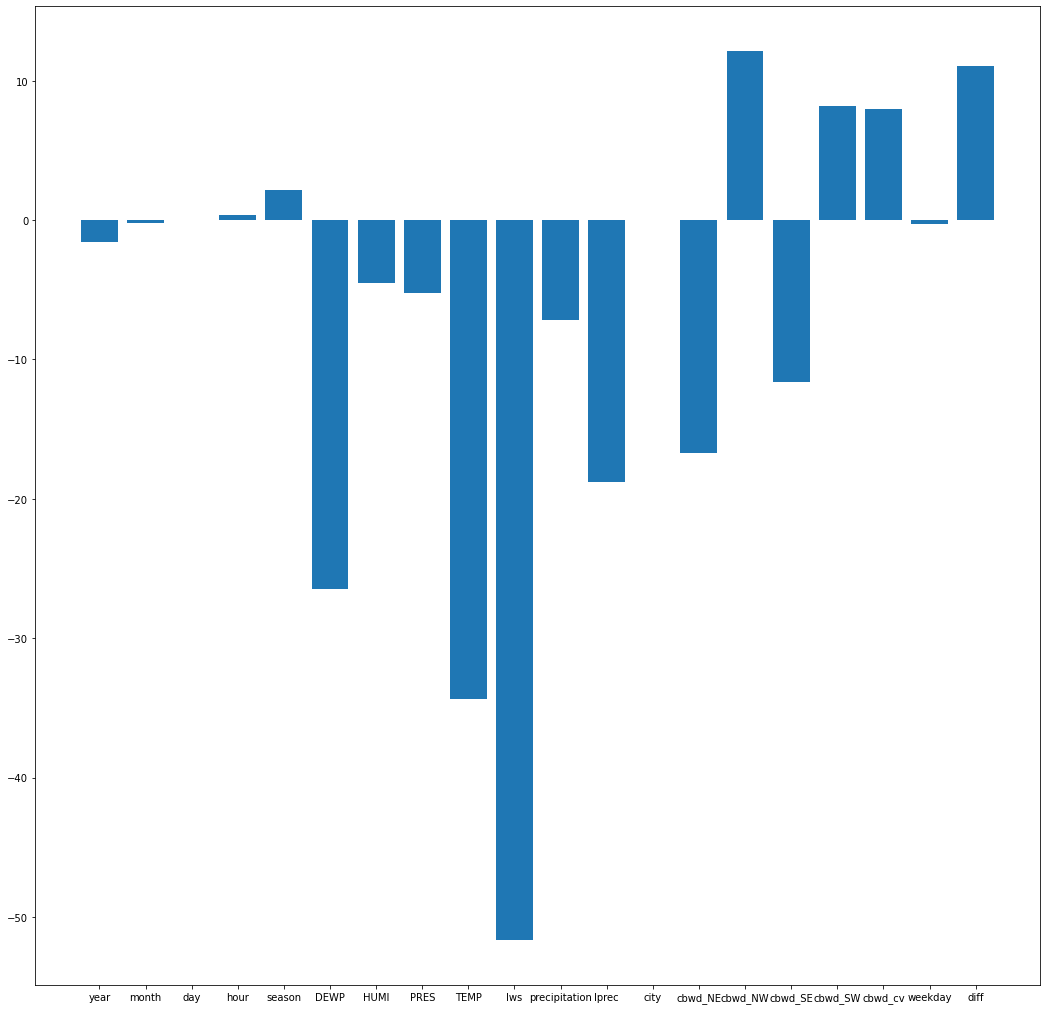

In [97]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Guangzhou

In [104]:
# split the dataset into trianing and test
attribute = guangzhou.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, guangzhou['PM_US Post'], test_size = 0.1
    , random_state = 0)

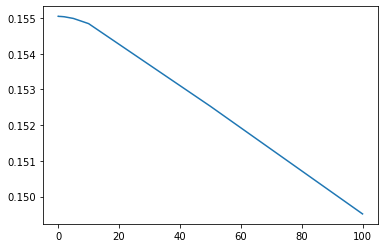

In [105]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

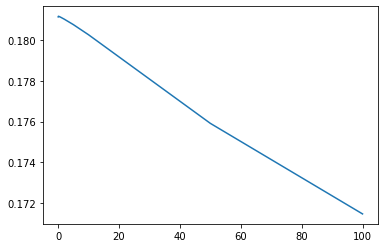

In [106]:
plt.plot(alpha_list, testAEs[0])

In [107]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -7.83592
month importance: -1.78616
day importance: 0.05736
hour importance: 0.29112
season importance: 3.81182
DEWP importance: -0.02868
HUMI importance: -0.06028
PRES importance: 26.69447
TEMP importance: -7.06128
Iws importance: -33.09957
precipitation importance: -6.14918
Iprec importance: -24.92372
city importance: 0.00000
cbwd_NE importance: -1.02224
cbwd_NW importance: 6.96748
cbwd_SE importance: -2.87110
cbwd_SW importance: -5.18861
cbwd_cv importance: 2.11447
weekday importance: 1.95202
diff importance: -0.00354


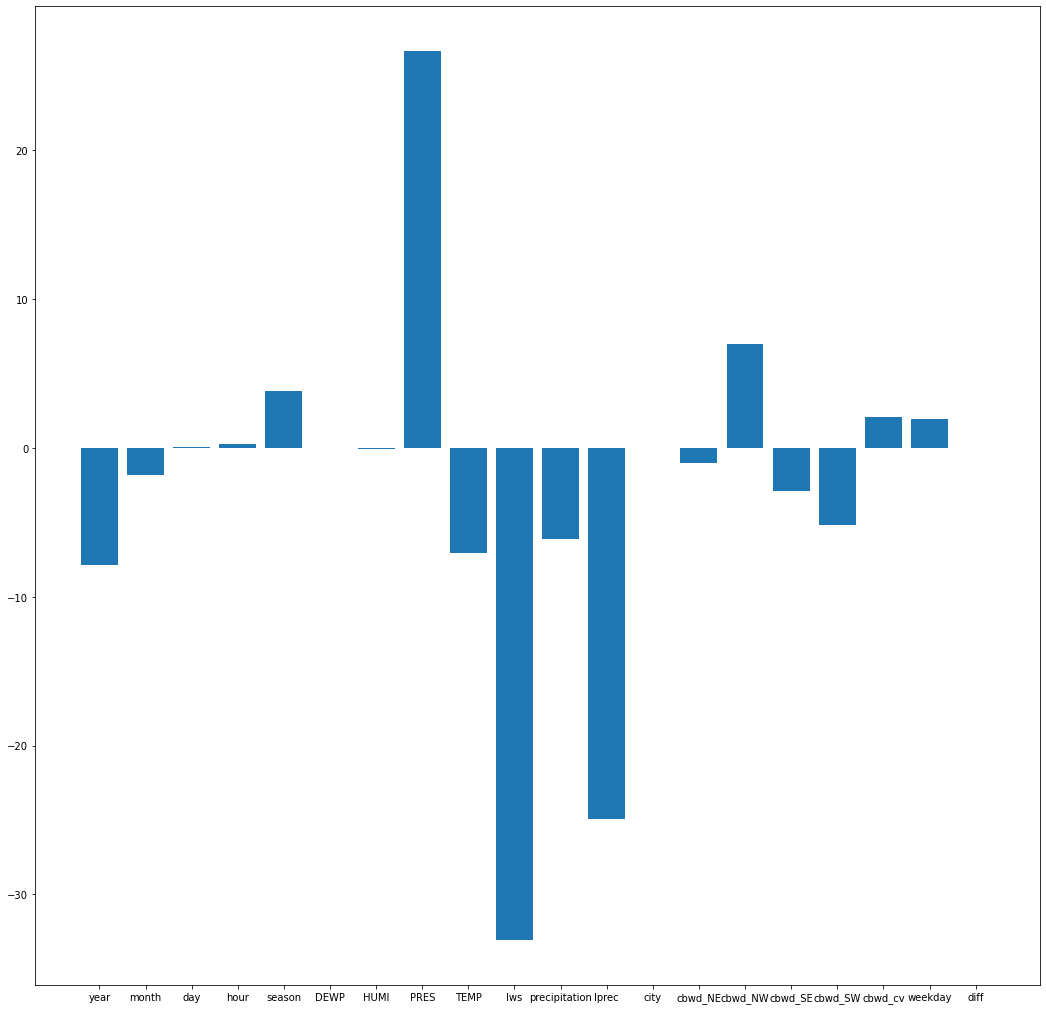

In [108]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Joint dataset

In [110]:
# split the dataset into trianing and test
attribute = data.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, data['PM_US Post'], test_size = 0.1
    , random_state = 0)

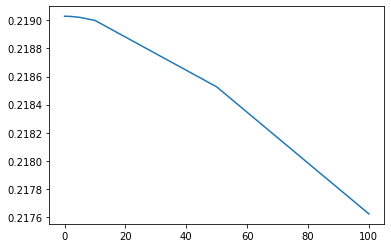

In [111]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Ridge(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

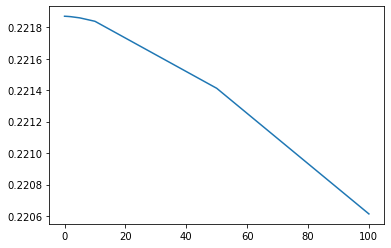

In [112]:
plt.plot(alpha_list, testAEs[0])

In [113]:
# get the feature importance
linear_ridge_best = linear_model.Ridge(alpha = 100).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -3.83612
month importance: -0.85951
day importance: 0.39620
hour importance: 0.55446
season importance: 7.29050
DEWP importance: -100.78341
HUMI importance: 87.08921
PRES importance: -49.66834
TEMP importance: -21.26054
Iws importance: -109.61617
precipitation importance: -33.60579
Iprec importance: -85.20678
city importance: -7.31211
cbwd_NE importance: -13.08302
cbwd_NW importance: -12.36549
cbwd_SE importance: 8.24493
cbwd_cv importance: 12.71920
cbwd_SW importance: 4.48438
weekday importance: -1.10486
diff importance: 2.62600


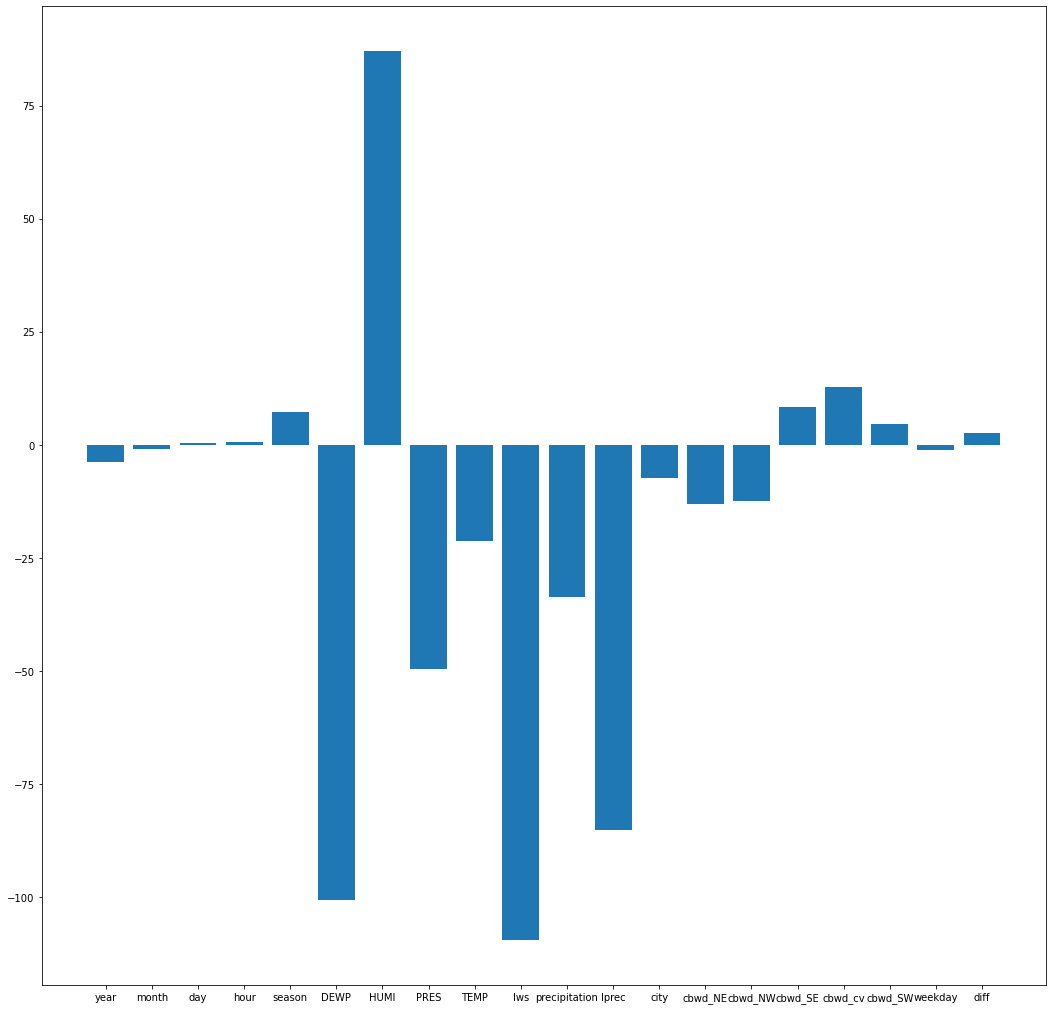

In [114]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### linear regression with LASSO regularization

#### Beijing

In [116]:
# take Beijing as an example, split the dataset into trianing and test
trainx, testx, trainy, testy = model_selection.train_test_split(
    beijing.drop('PM_US Post', axis = 1), beijing['PM_US Post'], test_size = 0.1
    , random_state = 0)

/Users/cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20037627.423200965, tolerance: 37510.48498123753
  model = cd_fast.enet_coordinate_descent(
/Users/cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20239271.446582496, tolerance: 37510.48498123753
  model = cd_fast.enet_coordinate_descent(


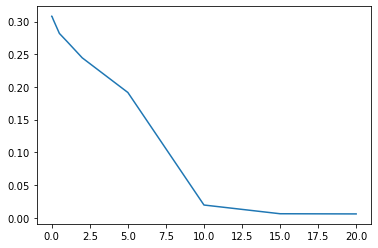

In [122]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

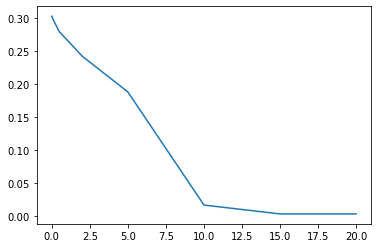

In [123]:
plt.plot(alpha_list, testAEs[0])

In [128]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 10).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % 
          (beijing.drop('PM_US Post', axis = 1).columns[i],v))

year importance: -0.00000
month importance: -0.00000
day importance: 0.70530
hour importance: 0.00000
season importance: 2.30664
DEWP importance: 0.00000
HUMI importance: 1.14254
PRES importance: -0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: 0.00000
cbwd_NE importance: -0.00000
cbwd_NW importance: -1.73073
cbwd_SE importance: 0.00000
cbwd_cv importance: 0.00000
cbwd_SW importance: 0.00000
weekday importance: -0.00000
diff importance: 0.00000


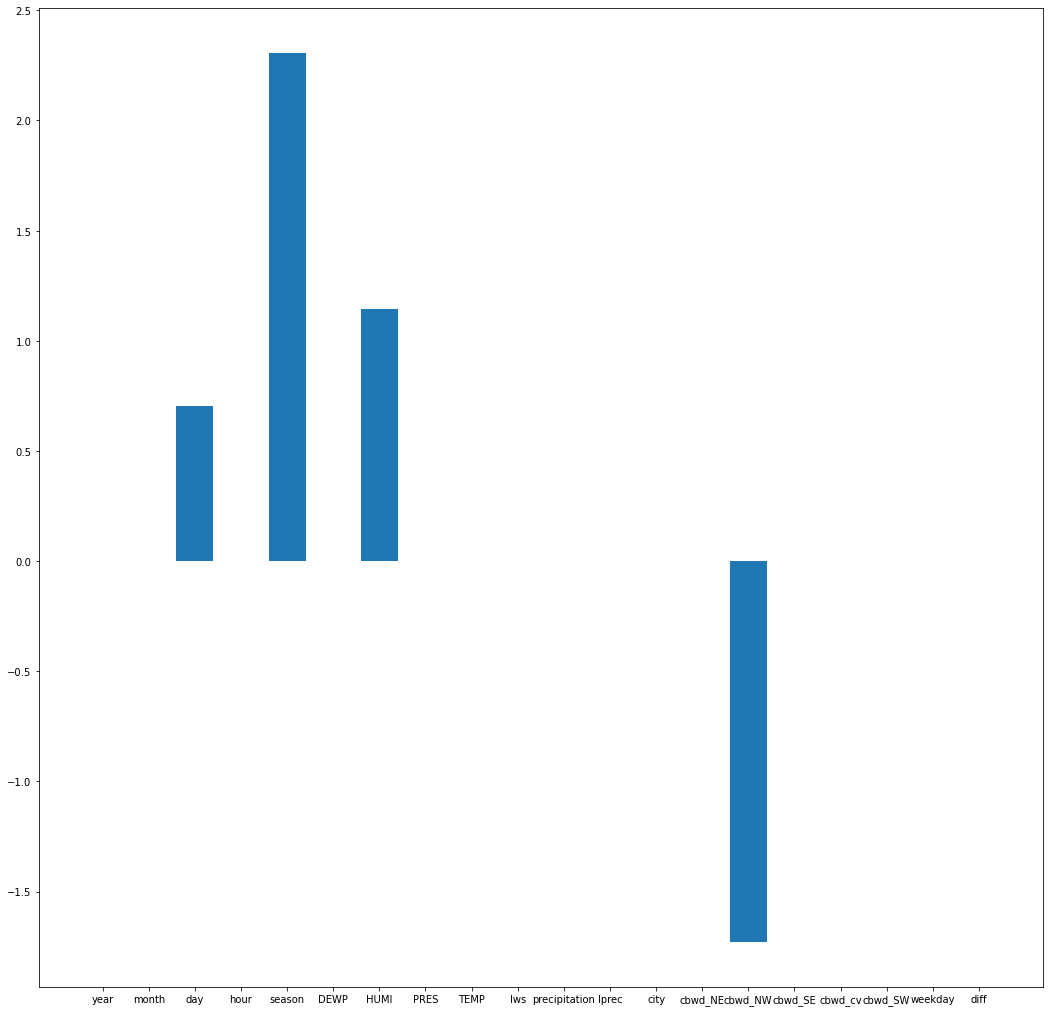

In [129]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(beijing.drop('PM_US Post', axis = 1).columns, importance)
plt.show()

#### Shanghai

In [181]:
# try shanghai, split the dataset into trianing and test
attribute = shanghai.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shanghai['PM_US Post'], test_size = 0.1
    , random_state = 0)

/Users/cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2757582.9614603743, tolerance: 5288.049030642688
  model = cd_fast.enet_coordinate_descent(


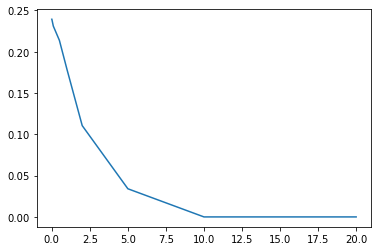

In [182]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

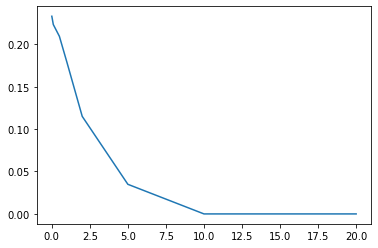

In [183]:
plt.plot(alpha_list, testAEs[0])

In [186]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 5).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -0.00000
month importance: -0.61005
day importance: -0.00000
hour importance: 0.00000
season importance: 3.74210
DEWP importance: -0.00000
HUMI importance: -0.00000
PRES importance: 0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: 0.00000
cbwd_NE importance: -0.00000
cbwd_NW importance: 0.00000
cbwd_SE importance: -0.00000
cbwd_SW importance: 0.00000
cbwd_cv importance: 0.00000
weekday importance: 0.00000
diff importance: -0.00000


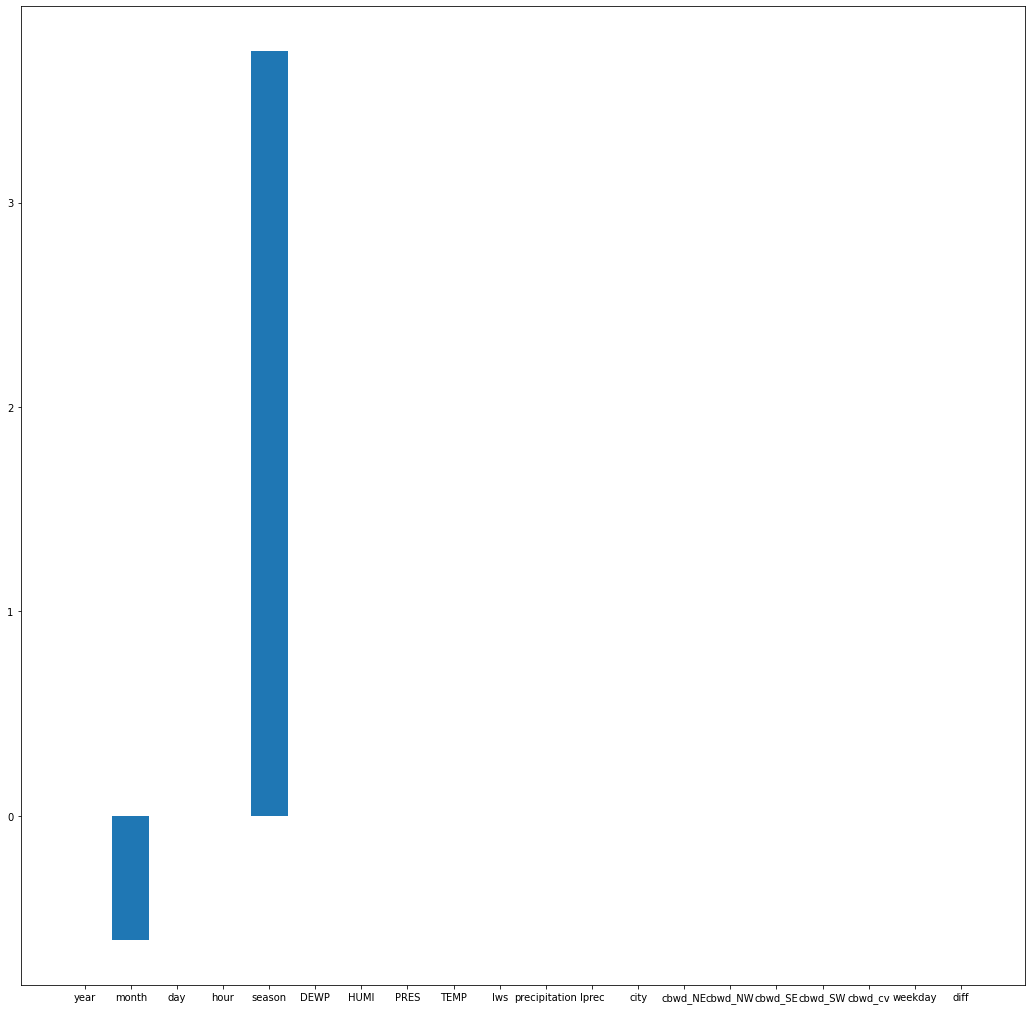

In [187]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Chengdu

In [141]:
# split the dataset into trianing and test
attribute = chengdu.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, chengdu['PM_US Post'], test_size = 0.1
    , random_state = 0)

/Users/cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3295140.4174937382, tolerance: 8299.572869132395
  model = cd_fast.enet_coordinate_descent(


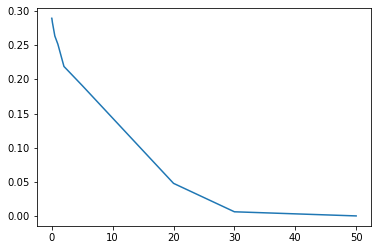

In [153]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 20, 30, 50]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

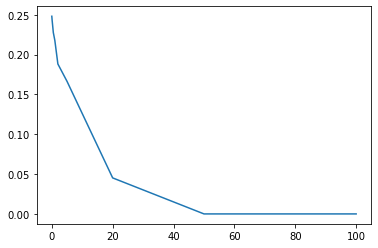

In [147]:
plt.plot(alpha_list, testAEs[0])

In [179]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 50).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.00000
month importance: 0.00000
day importance: 0.12704
hour importance: -0.00000
season importance: 0.00000
DEWP importance: -0.00000
HUMI importance: 0.00000
PRES importance: 0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: 0.00000
cbwd_NE importance: 0.00000
cbwd_NW importance: -0.00000
cbwd_SE importance: 0.00000
cbwd_SW importance: -0.00000
cbwd_cv importance: 0.00000
weekday importance: -0.00000
diff importance: 0.00000


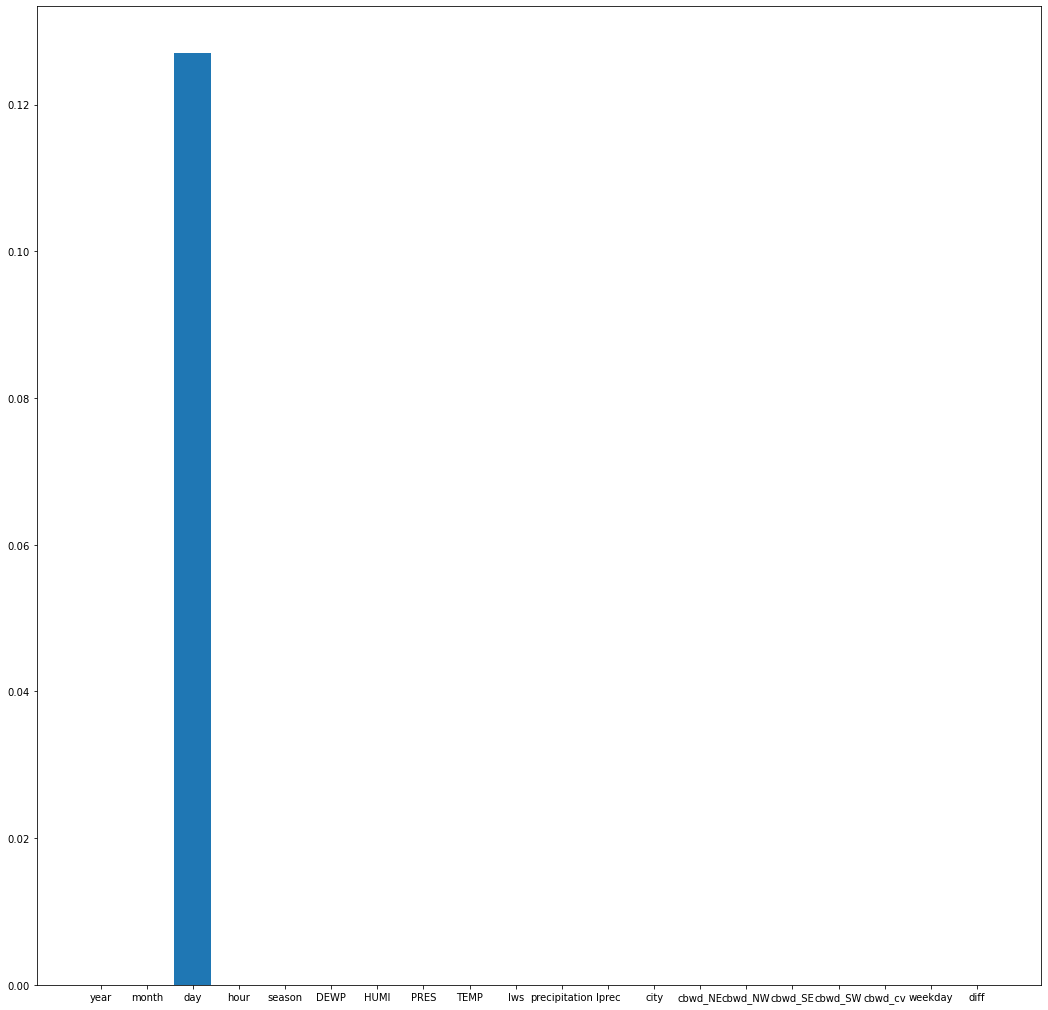

In [180]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Shenyang

In [174]:
# split the dataset into trianing and test
attribute = shenyang.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shenyang['PM_US Post'], test_size = 0.1
    , random_state = 0)

/Users/cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3596186.0612755194, tolerance: 8000.087785857873
  model = cd_fast.enet_coordinate_descent(


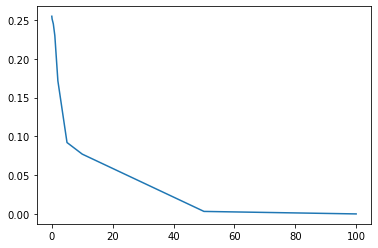

In [175]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

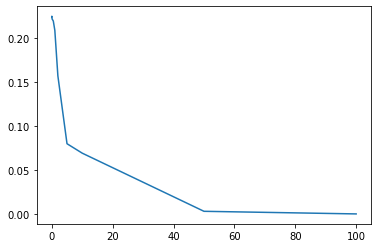

In [176]:
plt.plot(alpha_list, testAEs[0])

In [177]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 50).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.00000
month importance: 0.00000
day importance: 0.12704
hour importance: -0.00000
season importance: 0.00000
DEWP importance: -0.00000
HUMI importance: 0.00000
PRES importance: 0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: 0.00000
cbwd_NE importance: 0.00000
cbwd_NW importance: -0.00000
cbwd_SE importance: 0.00000
cbwd_SW importance: -0.00000
cbwd_cv importance: 0.00000
weekday importance: -0.00000
diff importance: 0.00000


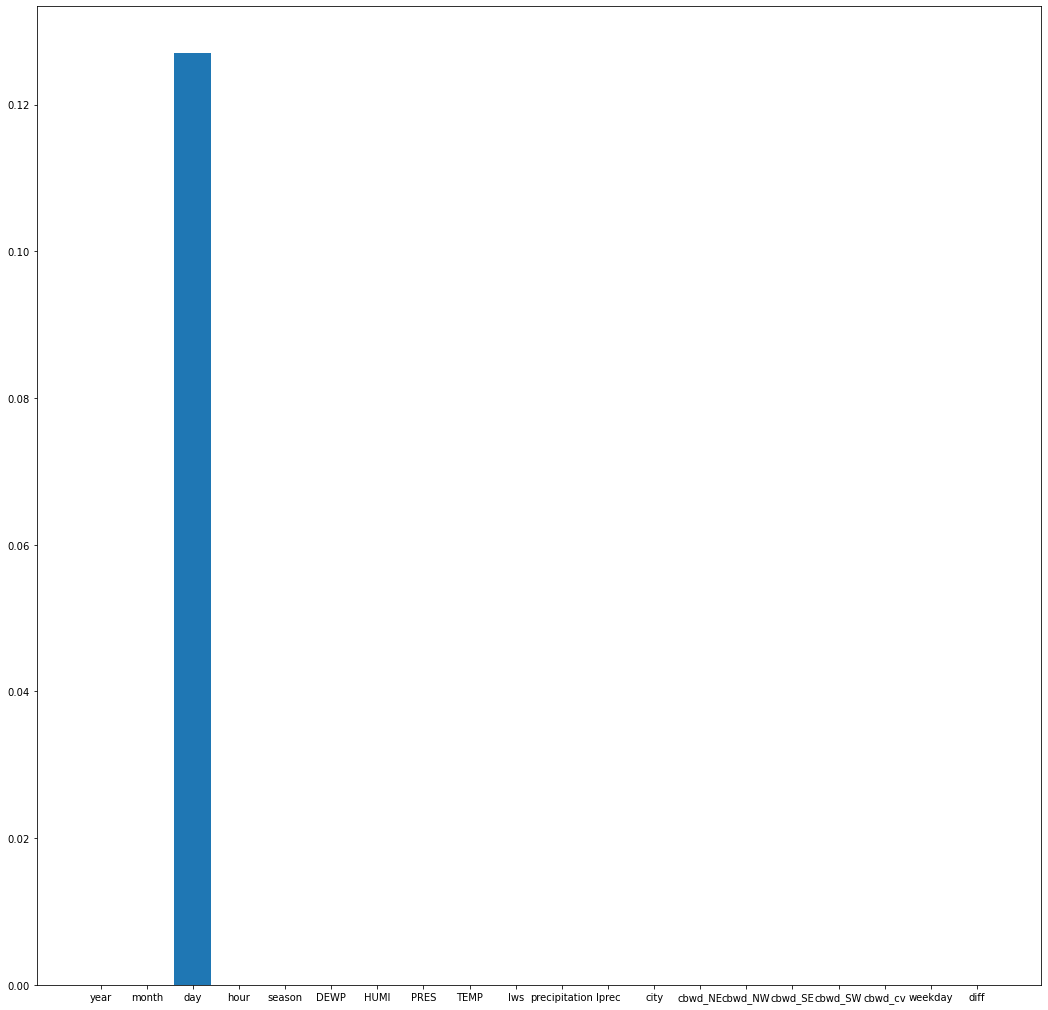

In [178]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Guangzhou

In [188]:
# split the dataset into trianing and test
attribute = guangzhou.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, guangzhou['PM_US Post'], test_size = 0.1
    , random_state = 0)

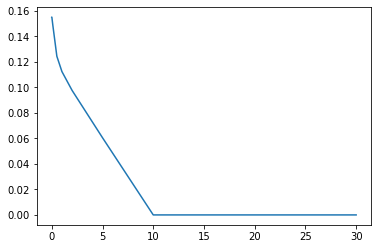

In [190]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

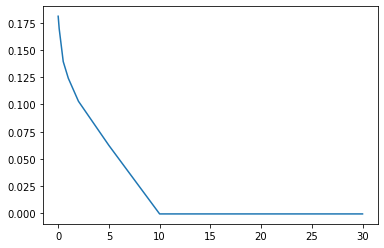

In [191]:
plt.plot(alpha_list, testAEs[0])

In [194]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 5).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -3.19158
month importance: -0.74842
day importance: 0.01005
hour importance: 0.06723
season importance: 2.24668
DEWP importance: -0.00000
HUMI importance: -0.00000
PRES importance: 0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: 0.00000
cbwd_NE importance: -0.00000
cbwd_NW importance: 0.00000
cbwd_SE importance: -0.00000
cbwd_SW importance: -0.00000
cbwd_cv importance: 0.00000
weekday importance: 0.00000
diff importance: -0.00000


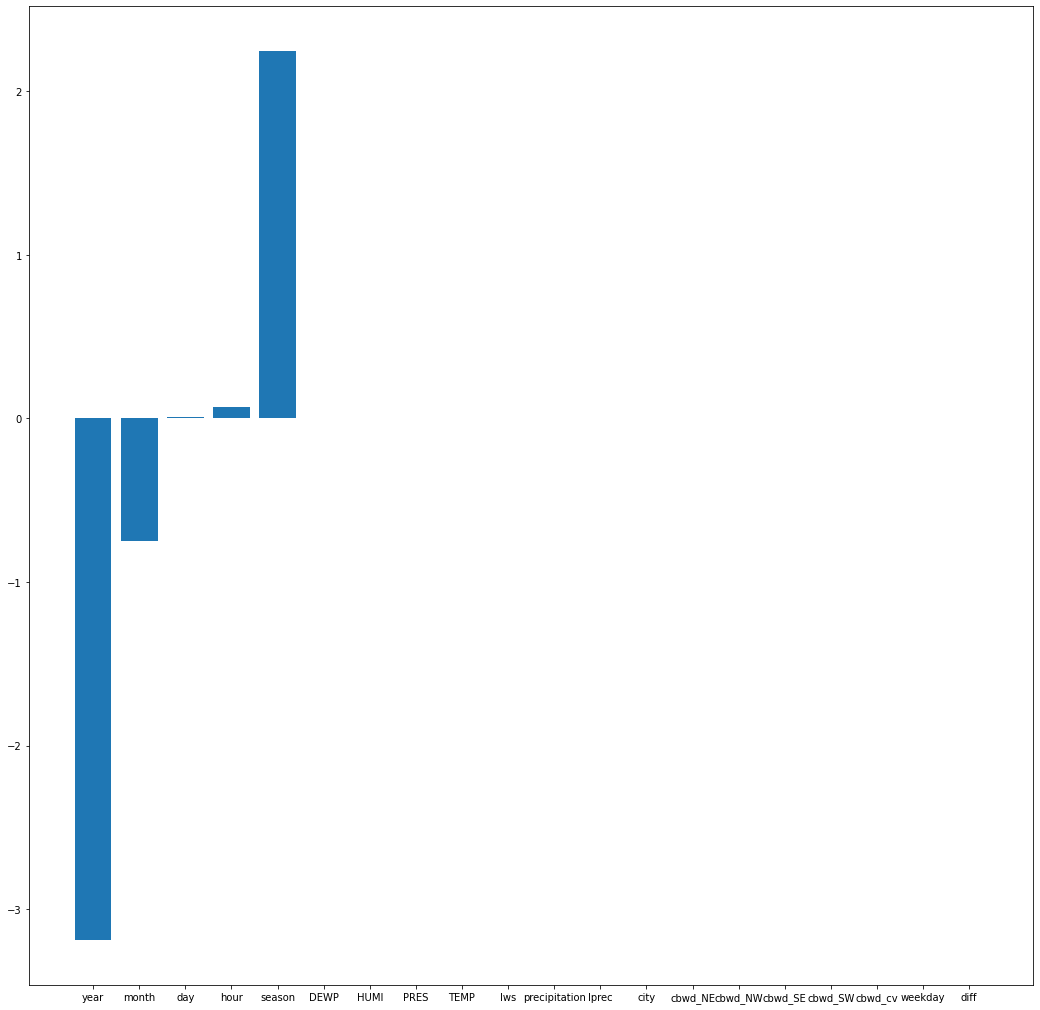

In [195]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

#### Joint dataset

In [196]:
# split the dataset into trianing and test
attribute = data.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, data['PM_US Post'], test_size = 0.1
    , random_state = 0)

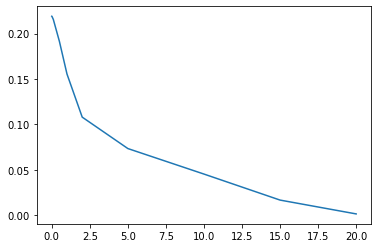

In [202]:
trainAEs = []
testAEs = []
alpha_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20]
for alpha in alpha_list:
    rr = linear_model.Lasso(alpha = alpha).fit(trainx, trainy)
    trainAEs.append(rr.score(trainx, trainy))
    testAEs.append(rr.score(testx, testy))
trainAEs = np.reshape(trainAEs, (1, 10))
testAEs = np.reshape(testAEs, (1, 10))
plt.plot(alpha_list, trainAEs[0])
plt.show()

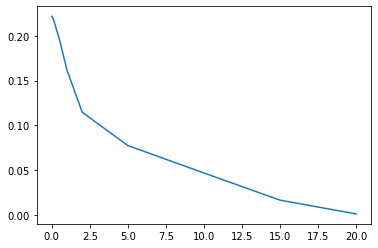

In [203]:
plt.plot(alpha_list, testAEs[0])

In [204]:
# get the feature importance
linear_ridge_best = linear_model.Lasso(alpha = 15).fit(trainx, trainy)
importance = linear_ridge_best.coef_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: -0.00000
month importance: -0.00000
day importance: 0.20974
hour importance: -0.00000
season importance: 0.00000
DEWP importance: -0.00000
HUMI importance: 0.00000
PRES importance: 0.00000
TEMP importance: -0.00000
Iws importance: -0.00000
precipitation importance: -0.00000
Iprec importance: -0.00000
city importance: -2.03688
cbwd_NE importance: -0.00000
cbwd_NW importance: -0.00000
cbwd_SE importance: 0.00000
cbwd_cv importance: 0.00000
cbwd_SW importance: -0.00000
weekday importance: -0.00000
diff importance: 0.00000


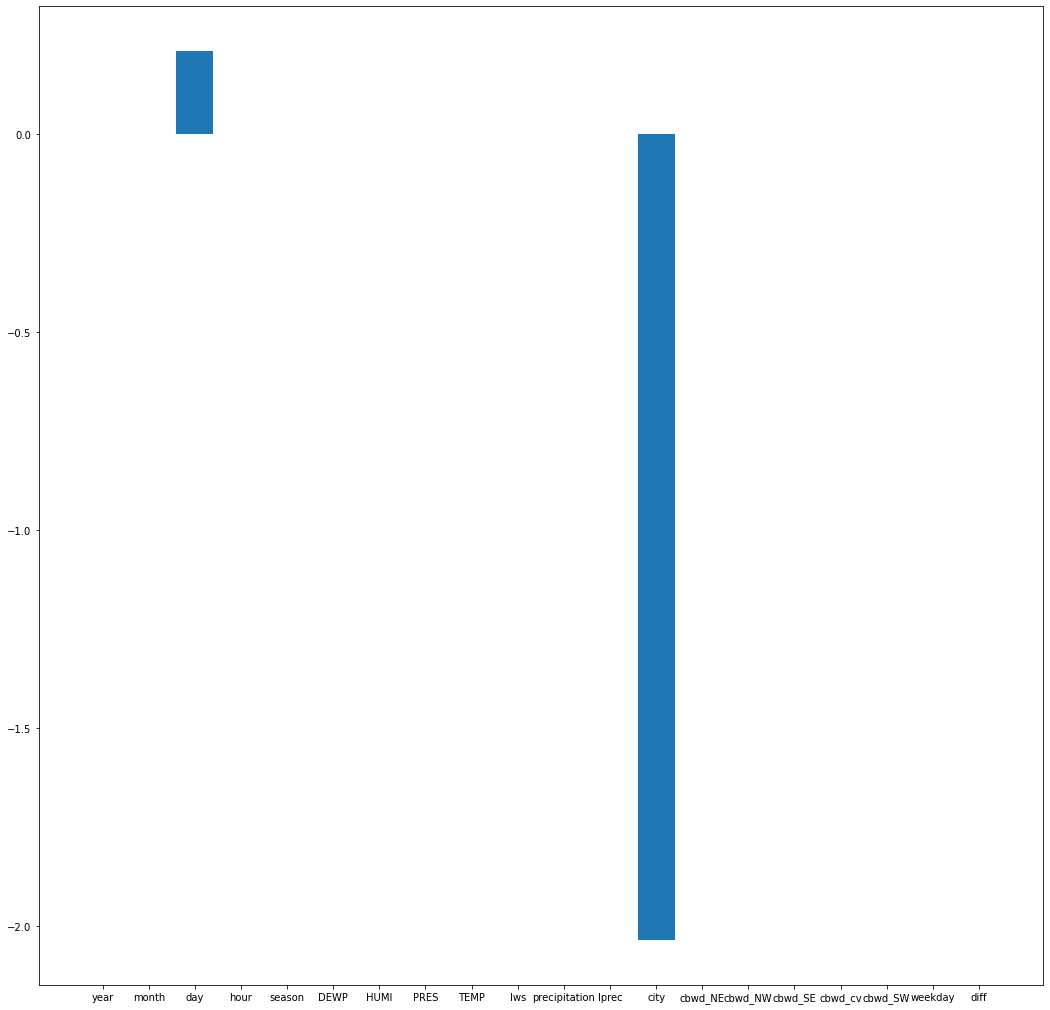

In [205]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

## Random forest

### Joint dataset

In [324]:
# split the dataset into trianing and test
attribute = data.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, data['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.7117977152755456 2


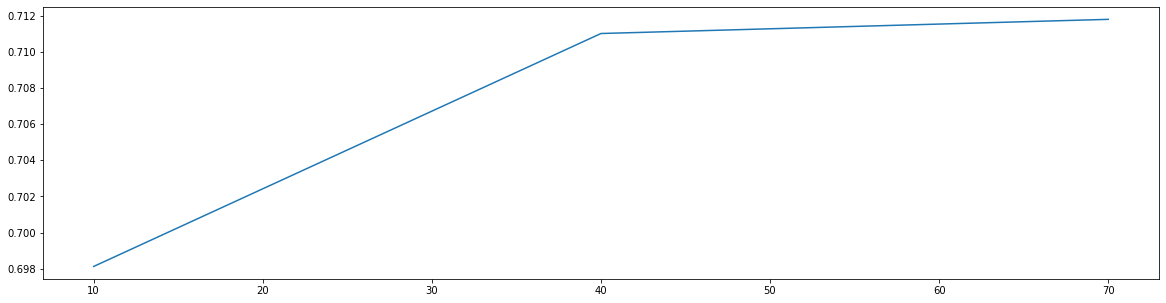

In [325]:
# purn the number of trees 
score_list = []
sort_range = range(10, 100, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7115808978130659 3


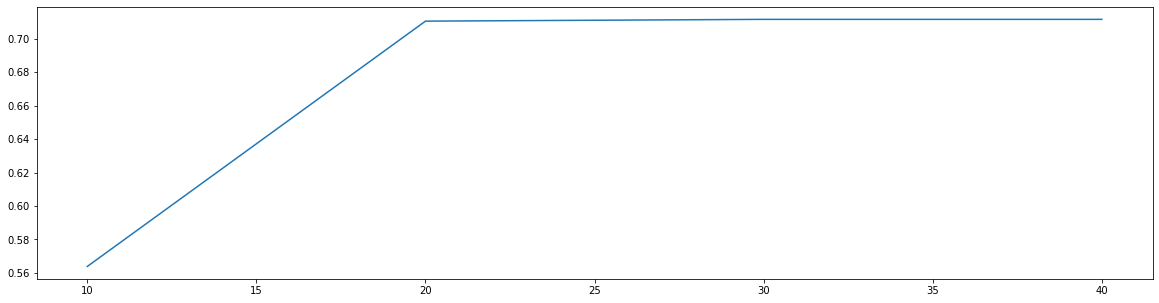

In [326]:
# get the number of trees, purn the maximium depth
ntree = 50
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6902359858172341 0


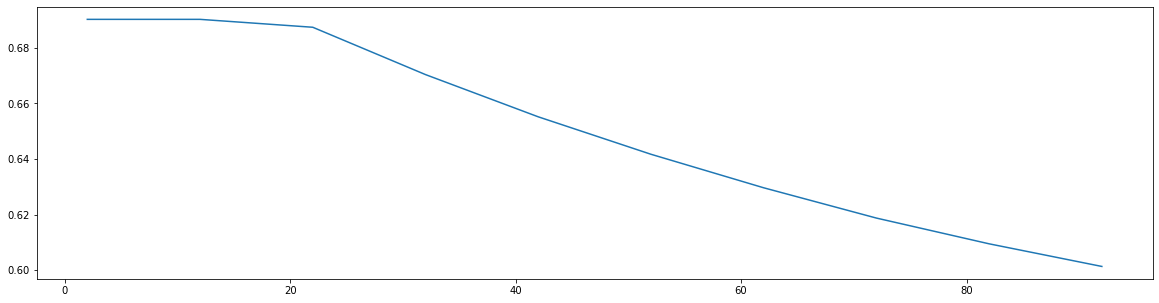

In [264]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7105119479787277 0


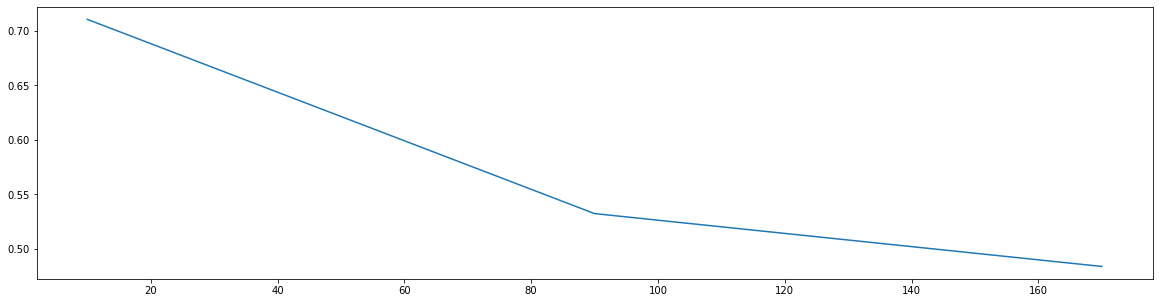

In [265]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [272]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

array([0.06045427, 0.08487055, 0.1060867 , 0.03043624, 0.05757232,
       0.12228776, 0.07289642, 0.06594074, 0.05406701, 0.12872308,
       0.00094616, 0.00407537, 0.11705087, 0.0073103 , 0.01105941,
       0.02264737, 0.00327296, 0.00221148, 0.01062525, 0.03746573])

In [273]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.06045
month importance: 0.08487
day importance: 0.10609
hour importance: 0.03044
season importance: 0.05757
DEWP importance: 0.12229
HUMI importance: 0.07290
PRES importance: 0.06594
TEMP importance: 0.05407
Iws importance: 0.12872
precipitation importance: 0.00095
Iprec importance: 0.00408
city importance: 0.11705
cbwd_NE importance: 0.00731
cbwd_NW importance: 0.01106
cbwd_SE importance: 0.02265
cbwd_cv importance: 0.00327
cbwd_SW importance: 0.00221
weekday importance: 0.01063
diff importance: 0.03747


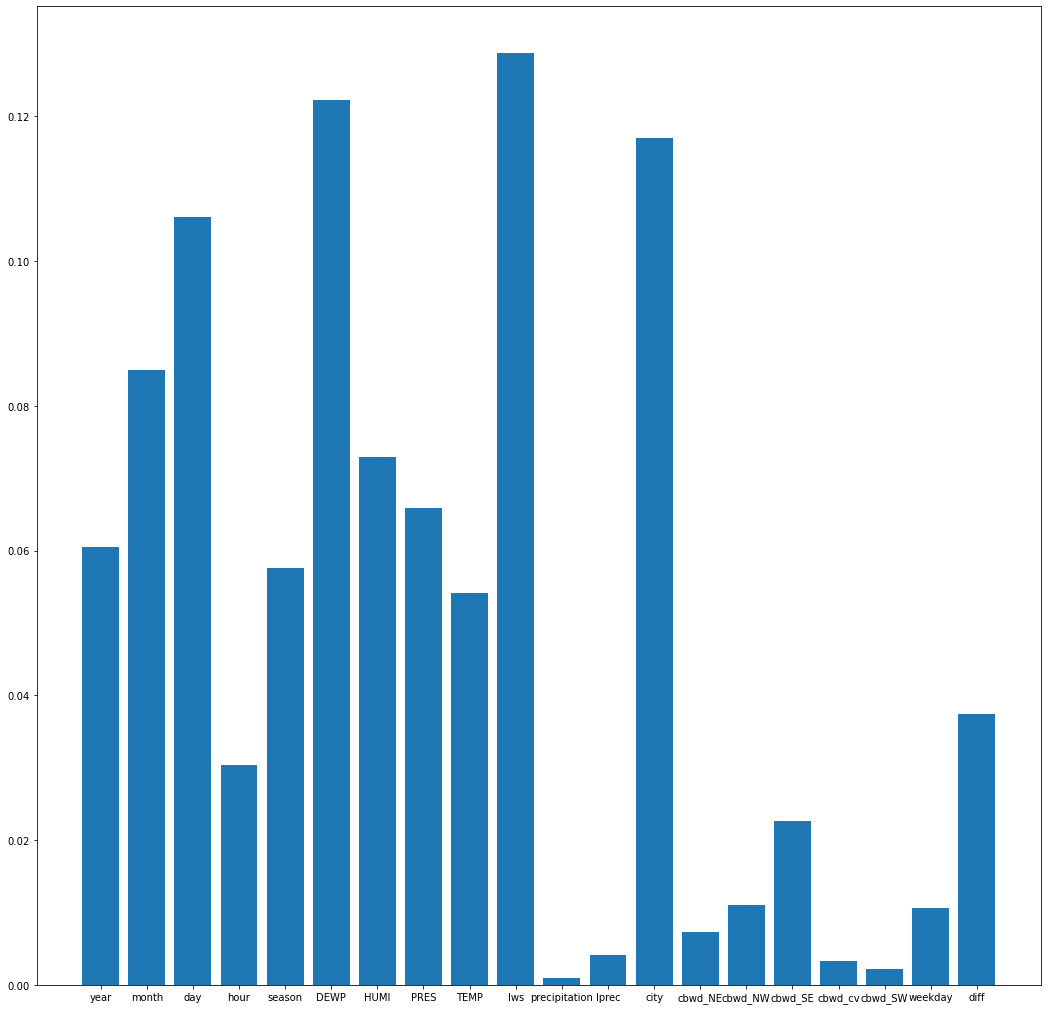

In [274]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### Beijing

In [278]:
# split the dataset into trianing and test
attribute = beijing.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, beijing['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.6724053115417078 3


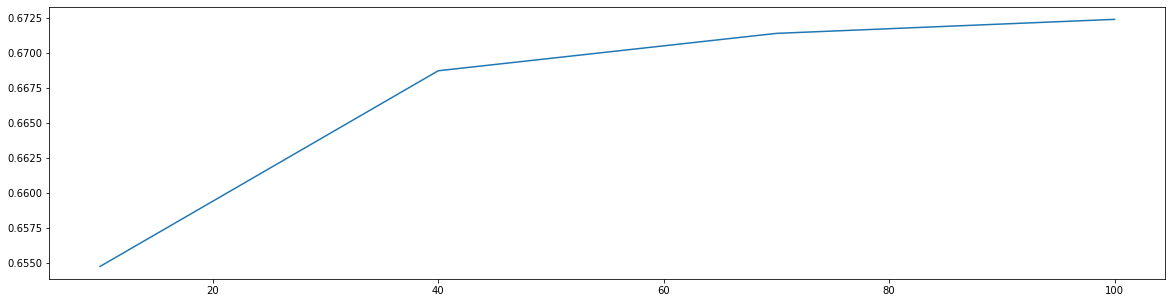

In [283]:
# purn the number of trees 
score_list = []
sort_range = range(10, 120, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.737373603157853 2


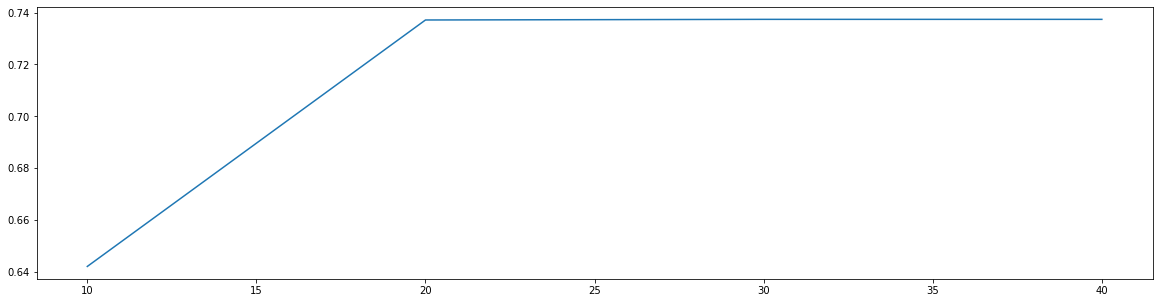

In [280]:
# get the number of trees, purn the maximium depth
ntree = 40
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6902359858172341 0


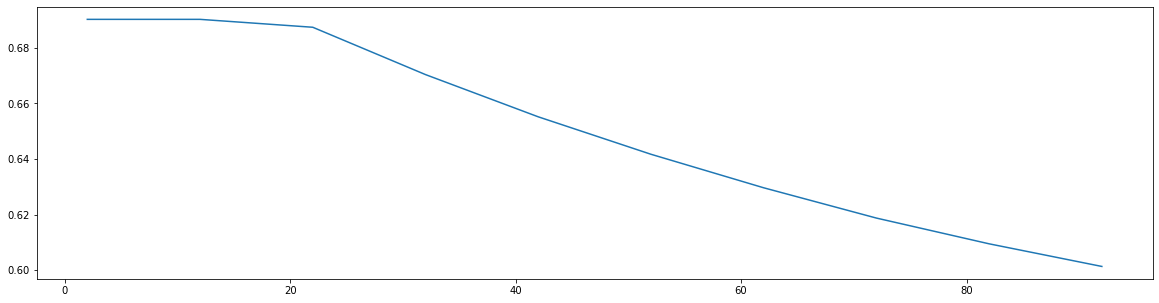

In [264]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7105119479787277 0


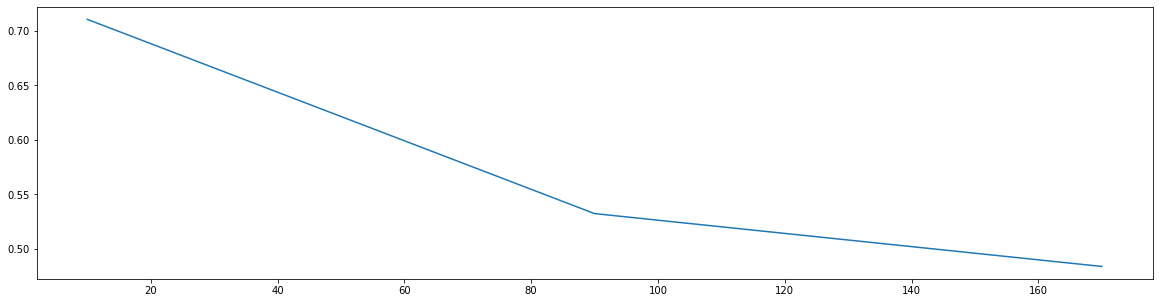

In [265]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [272]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

array([0.06045427, 0.08487055, 0.1060867 , 0.03043624, 0.05757232,
       0.12228776, 0.07289642, 0.06594074, 0.05406701, 0.12872308,
       0.00094616, 0.00407537, 0.11705087, 0.0073103 , 0.01105941,
       0.02264737, 0.00327296, 0.00221148, 0.01062525, 0.03746573])

In [273]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.06045
month importance: 0.08487
day importance: 0.10609
hour importance: 0.03044
season importance: 0.05757
DEWP importance: 0.12229
HUMI importance: 0.07290
PRES importance: 0.06594
TEMP importance: 0.05407
Iws importance: 0.12872
precipitation importance: 0.00095
Iprec importance: 0.00408
city importance: 0.11705
cbwd_NE importance: 0.00731
cbwd_NW importance: 0.01106
cbwd_SE importance: 0.02265
cbwd_cv importance: 0.00327
cbwd_SW importance: 0.00221
weekday importance: 0.01063
diff importance: 0.03747


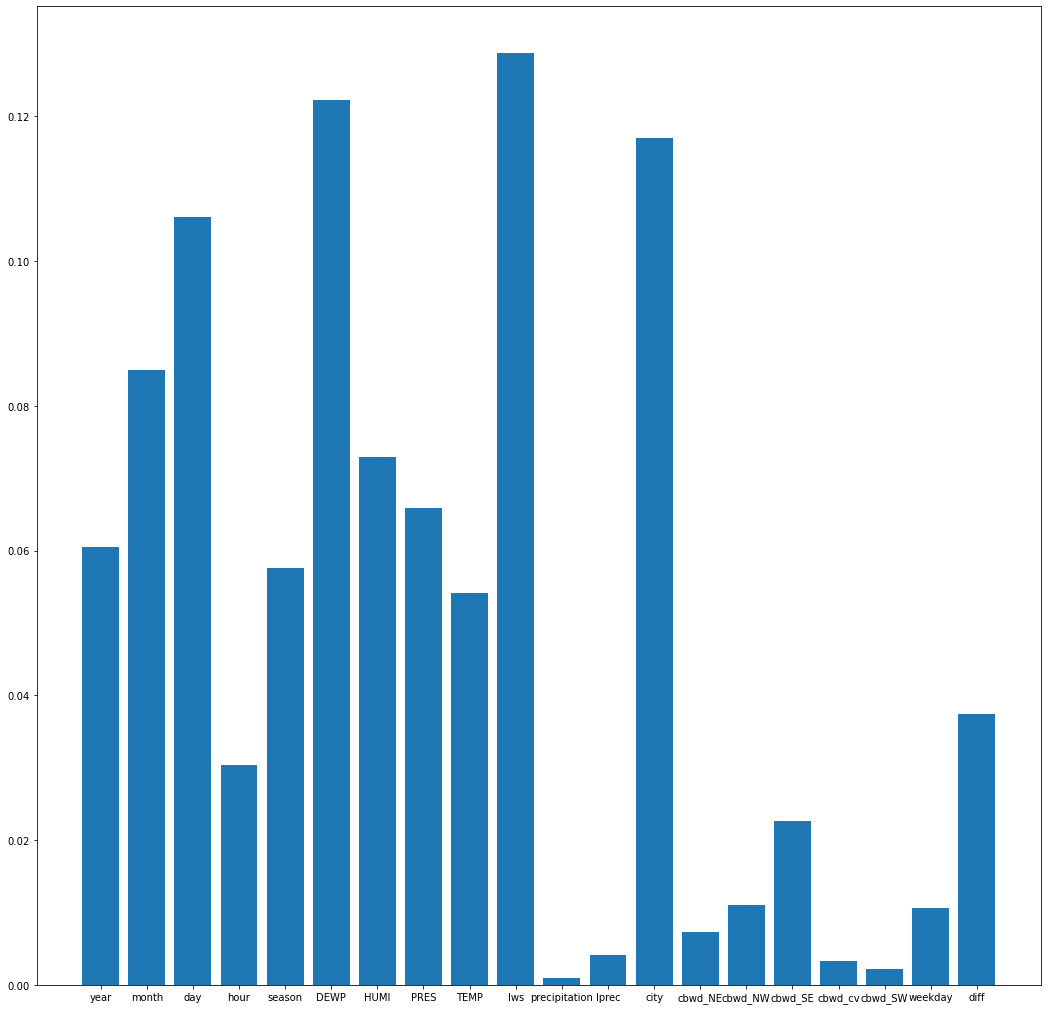

In [274]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### Shanghai

In [281]:
# split the dataset into trianing and test
attribute = shanghai.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shanghai['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.6714040605448388 2


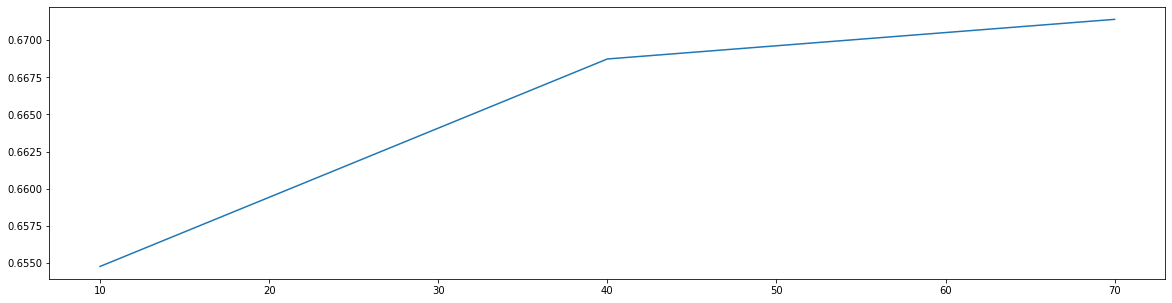

In [282]:
# purn the number of trees 
score_list = []
sort_range = range(10, 100, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.737373603157853 2


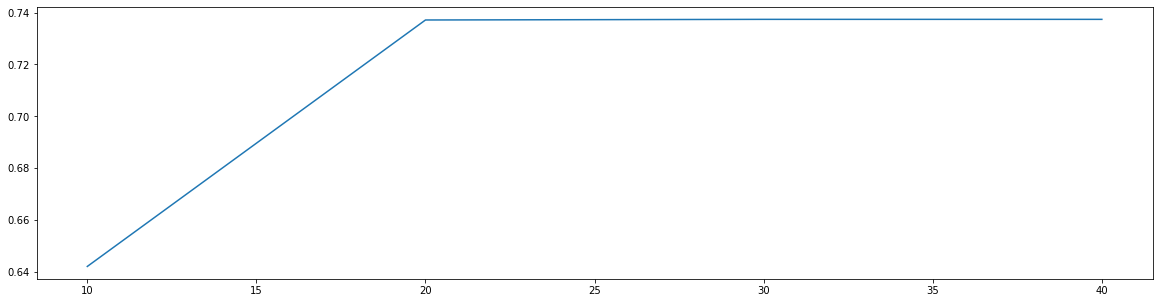

In [280]:
# get the number of trees, purn the maximium depth
ntree = 40
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6410443710697272 0


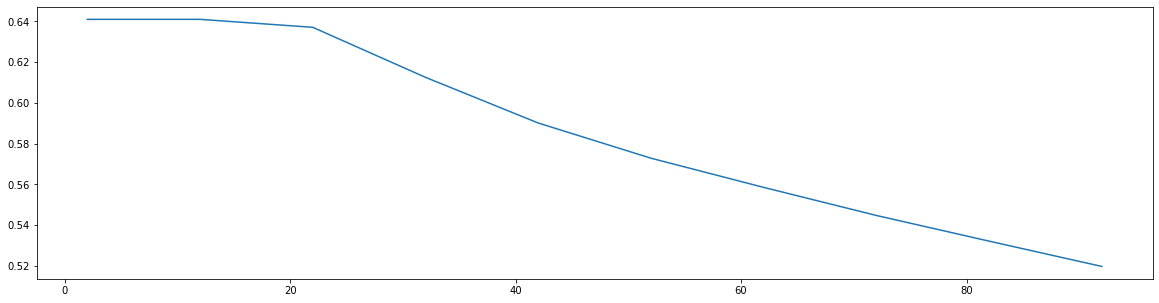

In [284]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6684559189432915 0


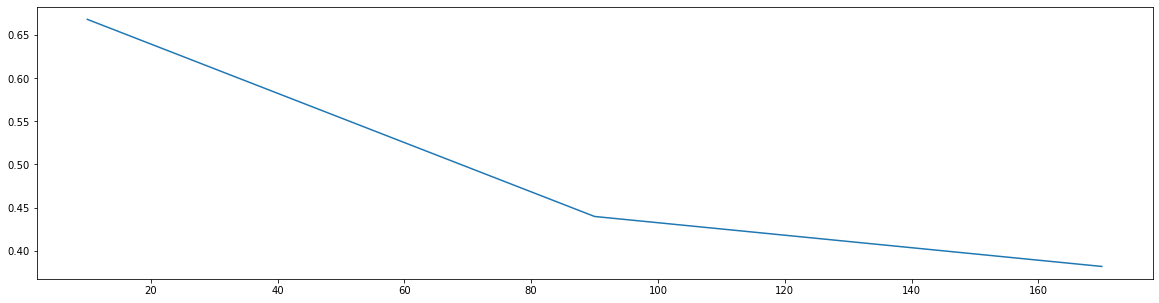

In [285]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [286]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

In [287]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.07262
month importance: 0.08836
day importance: 0.14193
hour importance: 0.03052
season importance: 0.03787
DEWP importance: 0.16426
HUMI importance: 0.04693
PRES importance: 0.06495
TEMP importance: 0.08438
Iws importance: 0.11133
precipitation importance: 0.00630
Iprec importance: 0.01584
city importance: 0.00000
cbwd_NE importance: 0.03769
cbwd_NW importance: 0.03738
cbwd_SE importance: 0.03075
cbwd_SW importance: 0.01198
cbwd_cv importance: 0.00168
weekday importance: 0.00962
diff importance: 0.00561


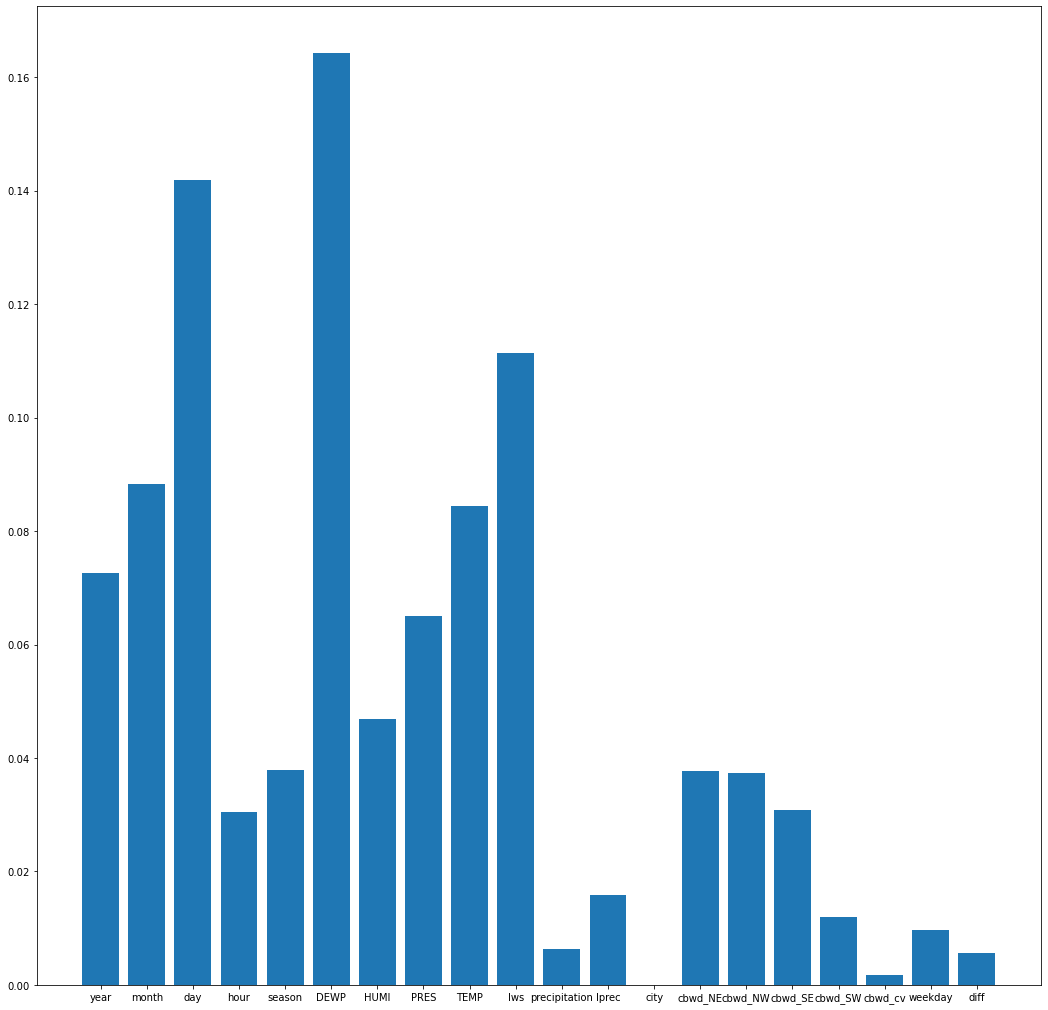

In [288]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### Chengdu

In [289]:
# split the dataset into trianing and test
attribute = chengdu.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, chengdu['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.7805863335704656 2


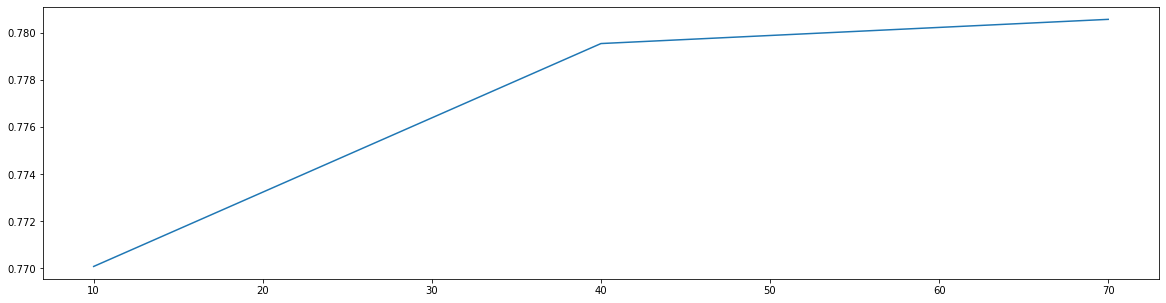

In [290]:
# purn the number of trees 
score_list = []
sort_range = range(10, 100, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7795581683501425 2


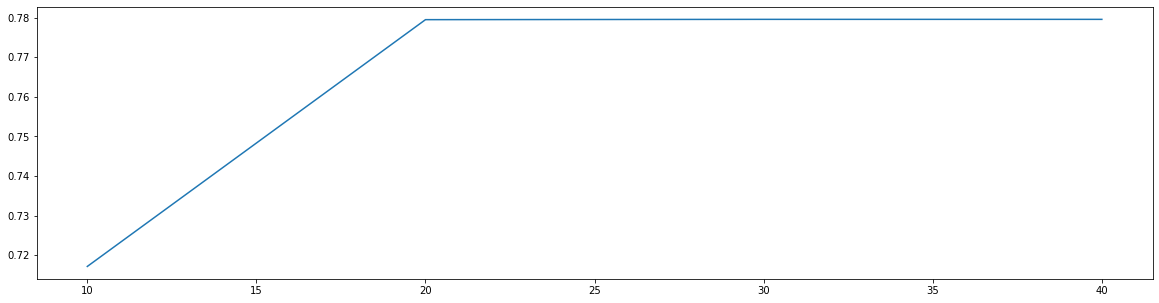

In [291]:
# get the number of trees, purn the maximium depth
ntree = 40
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7614561041589217 0


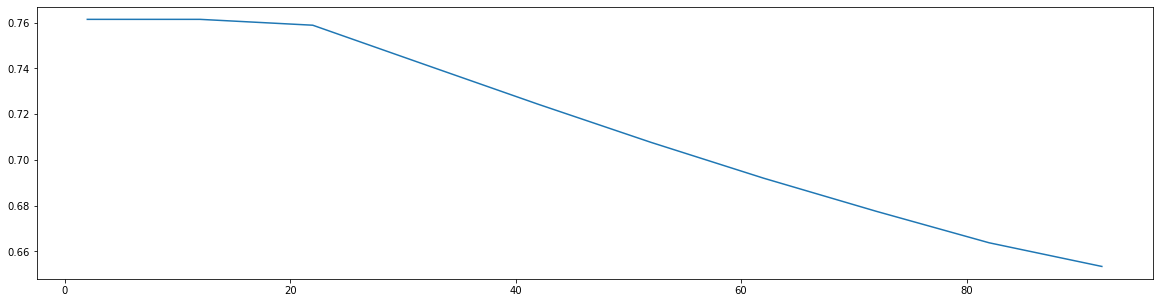

In [292]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.7794806273469873 0


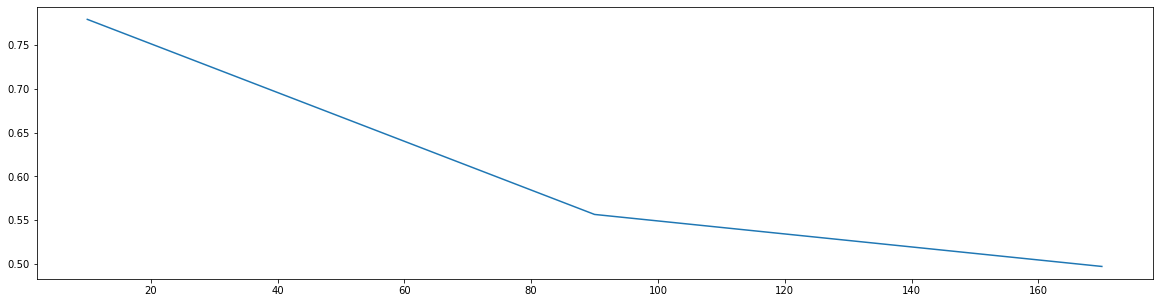

In [293]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [294]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

In [295]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.10160
month importance: 0.12050
day importance: 0.19948
hour importance: 0.02171
season importance: 0.24674
DEWP importance: 0.12485
HUMI importance: 0.04664
PRES importance: 0.06035
TEMP importance: 0.02182
Iws importance: 0.02387
precipitation importance: 0.00065
Iprec importance: 0.00453
city importance: 0.00000
cbwd_NE importance: 0.00173
cbwd_NW importance: 0.00226
cbwd_SE importance: 0.00016
cbwd_SW importance: 0.00111
cbwd_cv importance: 0.00316
weekday importance: 0.01301
diff importance: 0.00583


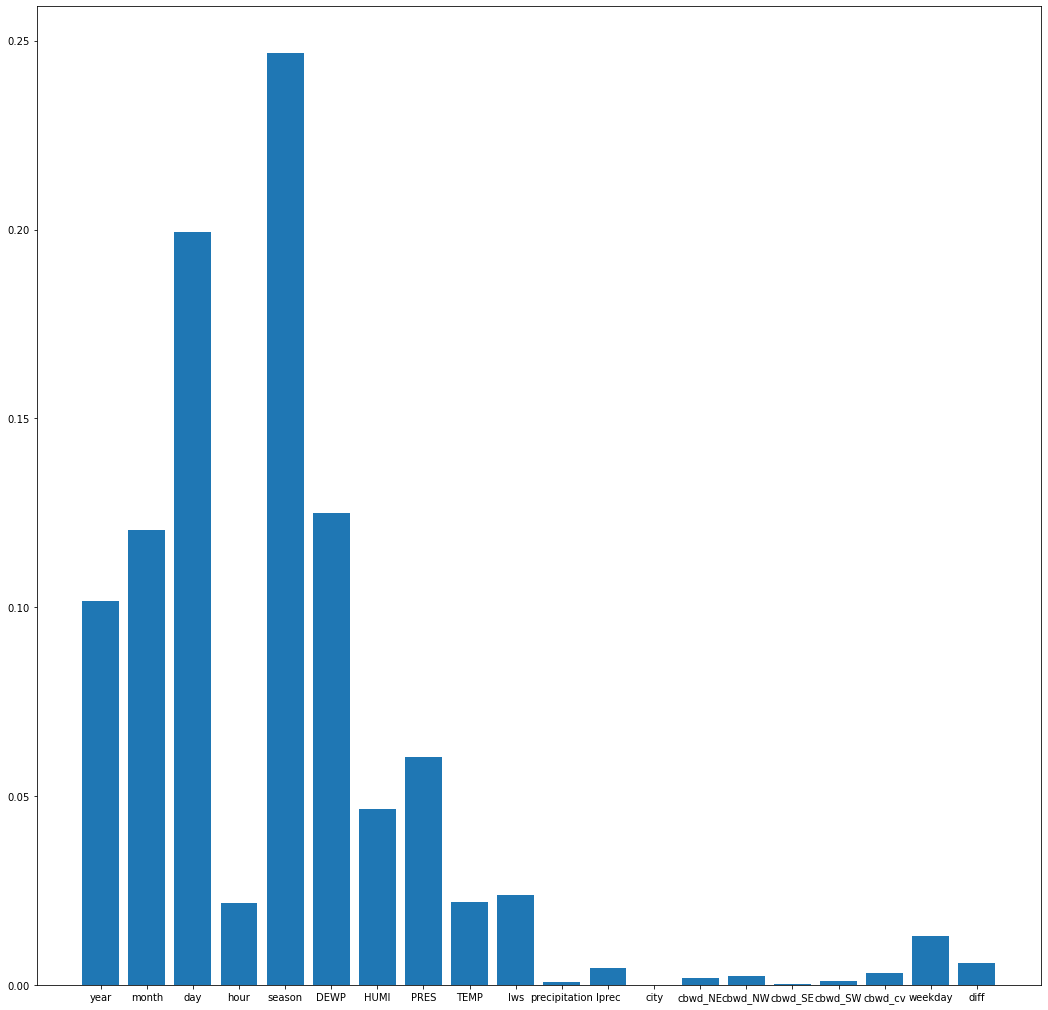

In [296]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### Shenyang

In [297]:
# split the dataset into trianing and test
attribute = shenyang.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, shenyang['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.622333690200709 2


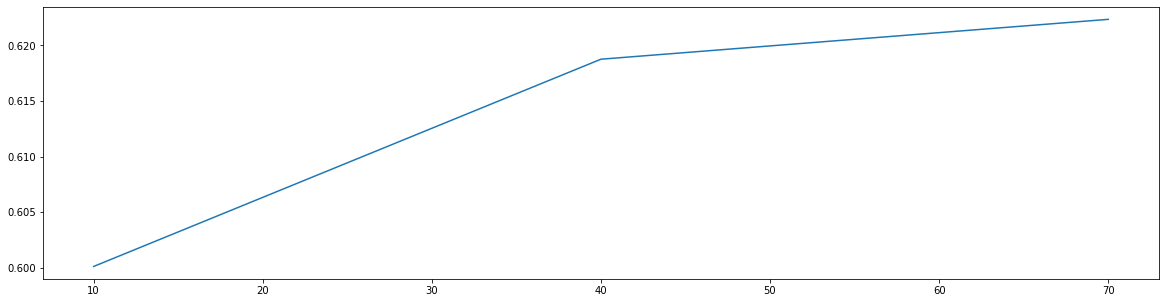

In [299]:
# purn the number of trees 
score_list = []
sort_range = range(10, 100, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6187513550570694 2


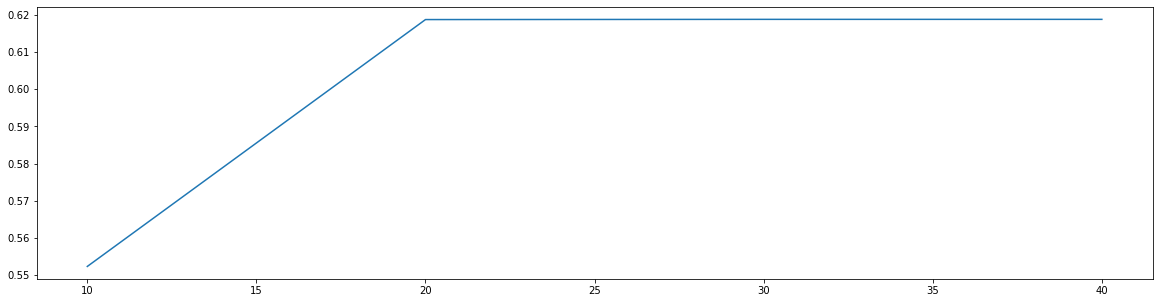

In [300]:
# get the number of trees, purn the maximium depth
ntree = 40
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.5961478905639146 0


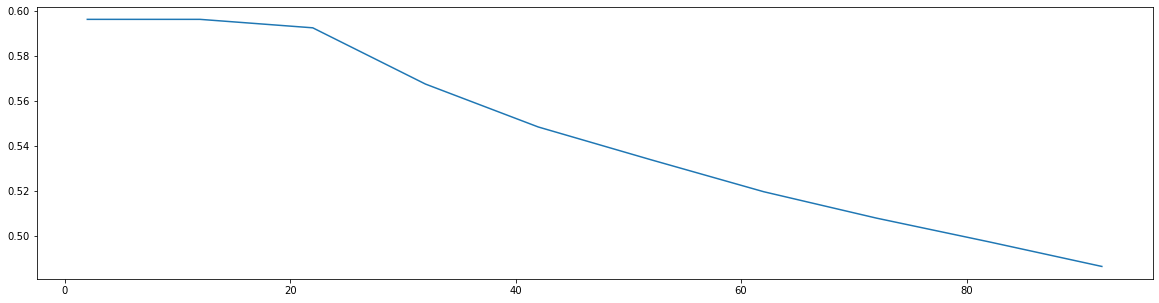

In [301]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6186930797565525 0


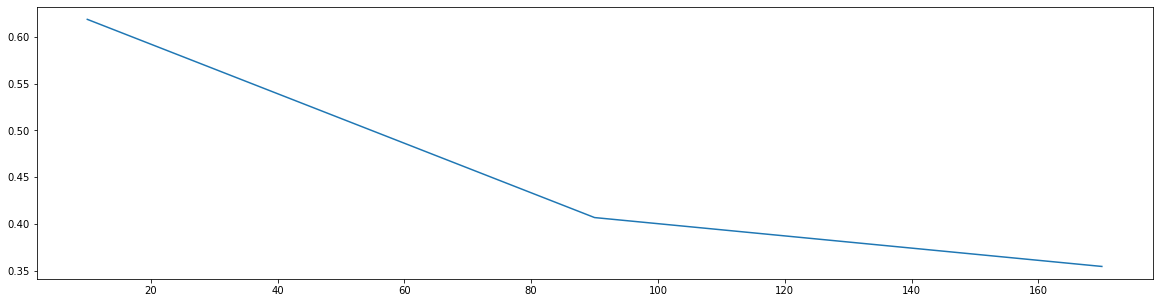

In [302]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [303]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

In [304]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.02988
month importance: 0.07530
day importance: 0.13208
hour importance: 0.03617
season importance: 0.02582
DEWP importance: 0.07188
HUMI importance: 0.13524
PRES importance: 0.12149
TEMP importance: 0.18972
Iws importance: 0.05275
precipitation importance: 0.00088
Iprec importance: 0.00212
city importance: 0.00000
cbwd_NE importance: 0.02080
cbwd_NW importance: 0.04469
cbwd_SE importance: 0.01010
cbwd_SW importance: 0.00912
cbwd_cv importance: 0.00235
weekday importance: 0.01426
diff importance: 0.02536


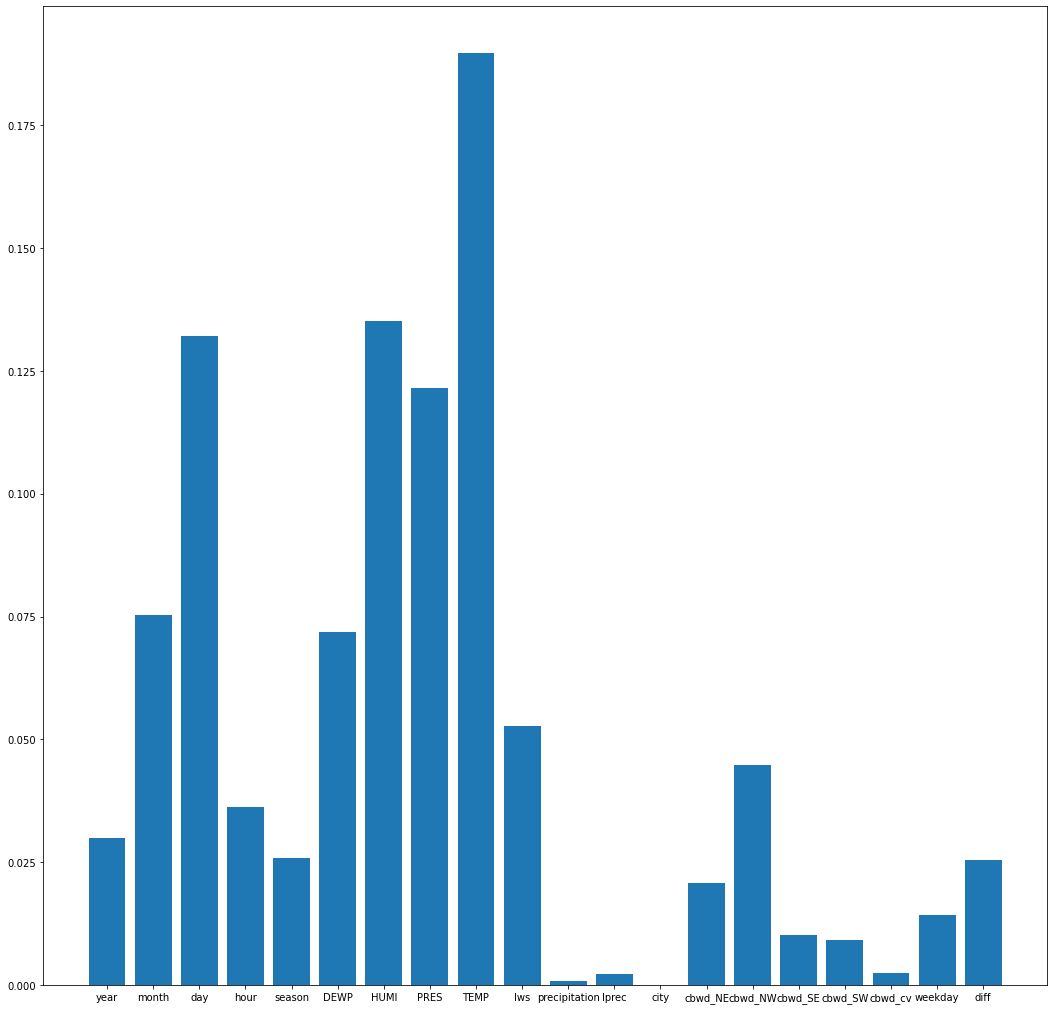

In [305]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()

### Guangzhou

In [306]:
# split the dataset into trianing and test
attribute = guangzhou.drop('PM_US Post', axis = 1)
trainx, testx, trainy, testy = model_selection.train_test_split(
    attribute, guangzhou['PM_US Post'], test_size = 0.1
    , random_state = 0)

0.692887910482848 1


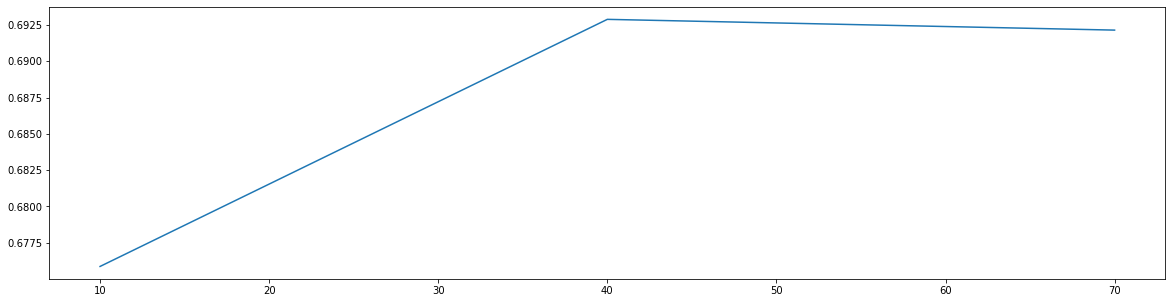

In [307]:
# purn the number of trees 
score_list = []
sort_range = range(10, 100, 30)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = val, 
                                        max_depth = 100, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.692887910482848 2


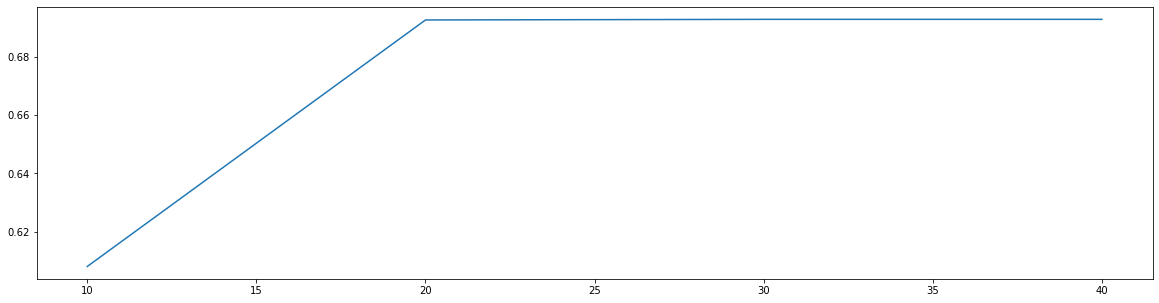

In [308]:
# get the number of trees, purn the maximium depth
ntree = 40
score_list = []
sort_range = range(10, 50, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = val, 
                                        min_samples_split = 10, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6650937692162664 0


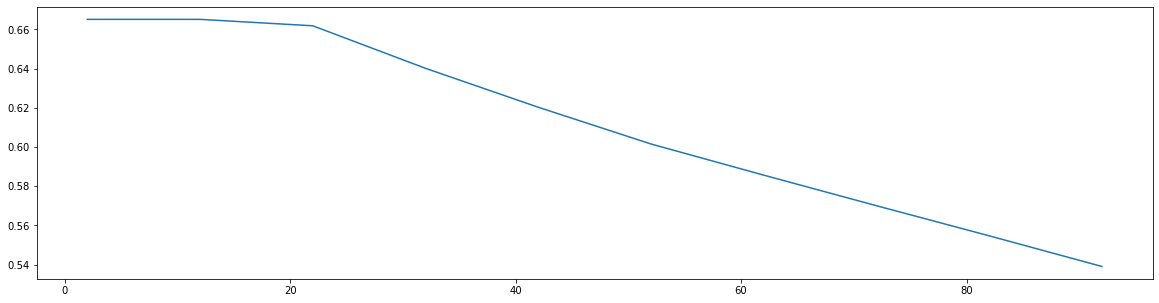

In [309]:
# get the max depth, purn minimun samples to split
mdepth = 20
score_list = []
sort_range = range(2, 100, 10)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = val, 
                                        min_samples_leaf = 10,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=3).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()

0.6926813001747101 0


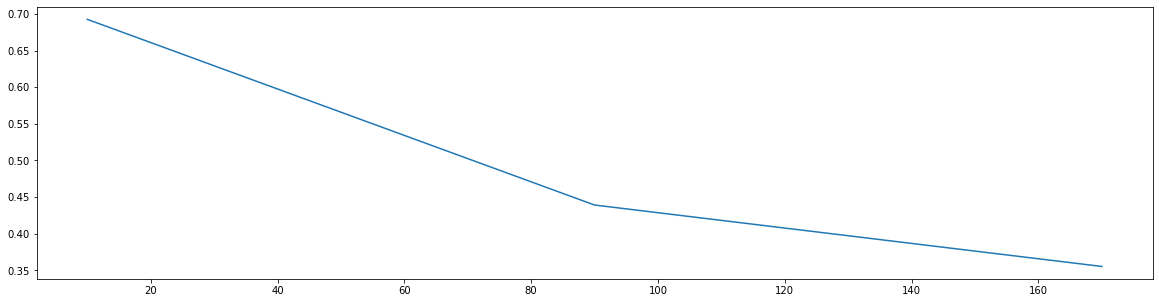

In [310]:
# get minimum samples to split, purn minimum samples in one leaf
mss = sort_range[score_list.index(max(score_list))]
score_list = []
sort_range = range(10, 250, 80)
for val in list(sort_range):
    rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = val,
                                        random_state = 0)
    
    score = cross_val_score(rf, trainx, trainy, cv=5).mean()
    score_list.append(score)
print(max(score_list), score_list.index(max(score_list)))

plt.figure(figsize = [20, 5])
plt.plot(sort_range, score_list)
plt.show()
sampleleaf = sort_range[score_list.index(max(score_list))]

In [311]:
# get the feature importances
best_rf = ensemble.RandomForestRegressor(n_estimators = ntree, 
                                        max_depth = mdepth, 
                                        min_samples_split = mss, 
                                        min_samples_leaf = sampleleaf,
                                        random_state = 0).fit(trainx, trainy) 

In [312]:
importance = best_rf.feature_importances_
for i,v in enumerate(importance):
    print('%0s importance: %.5f' % (attribute.columns[i],v))

year importance: 0.14417
month importance: 0.15882
day importance: 0.17325
hour importance: 0.03067
season importance: 0.03646
DEWP importance: 0.19270
HUMI importance: 0.01797
PRES importance: 0.09089
TEMP importance: 0.04442
Iws importance: 0.04198
precipitation importance: 0.00258
Iprec importance: 0.01563
city importance: 0.00000
cbwd_NE importance: 0.00677
cbwd_NW importance: 0.00419
cbwd_SE importance: 0.00223
cbwd_SW importance: 0.00068
cbwd_cv importance: 0.00000
weekday importance: 0.01124
diff importance: 0.02535


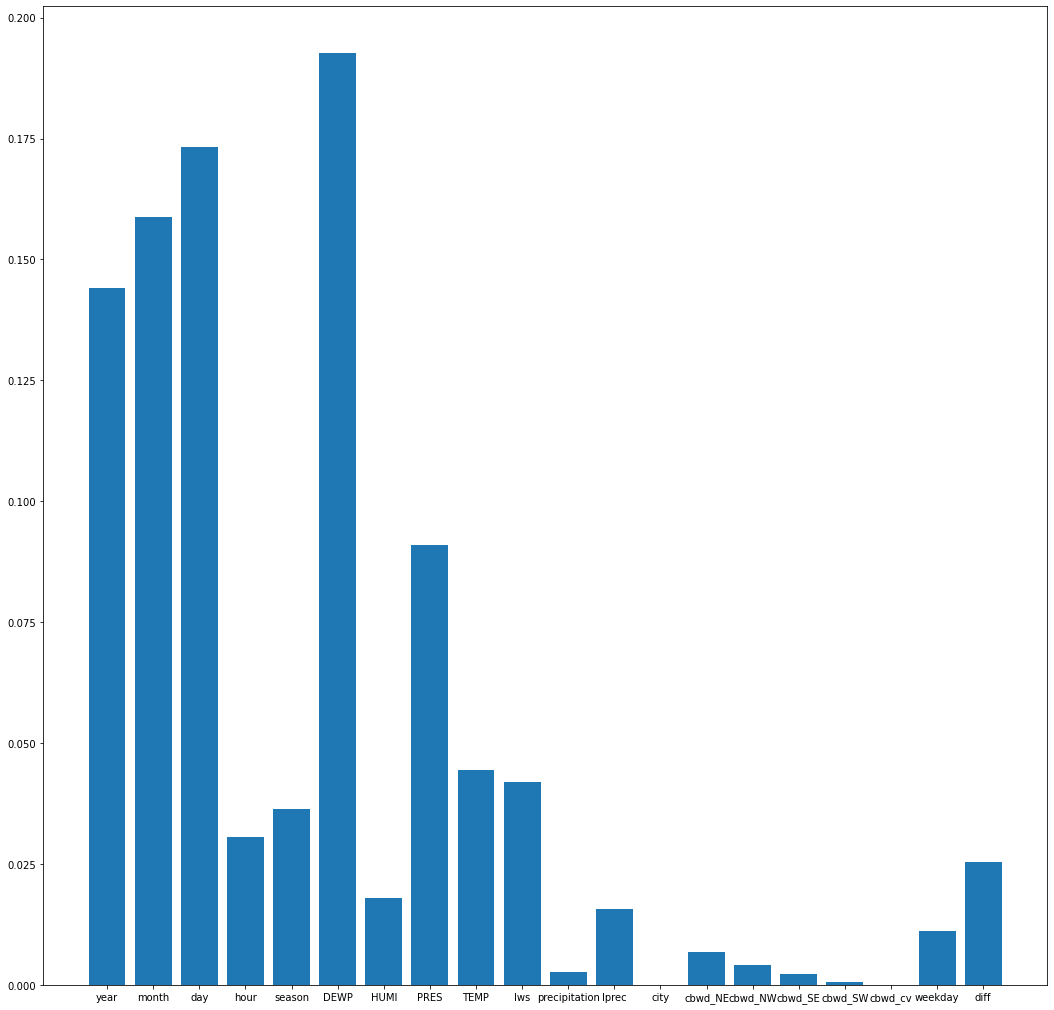

In [313]:
# plot the feature importance
plt.figure(figsize = (18, 18))
plt.bar(attribute.columns, importance)
plt.show()